In [112]:
import pandas as pd

# Load the Excel file to see what sheets are available
file_path = 'data/참가자_목록.xlsx'
xl = pd.ExcelFile(file_path)
xl.sheet_names


['참가자', '제출자', '결선진출', 'Sheet2', 'Sheet3']

In [113]:
# Load each relevant sheet to examine the data structure
participants = pd.read_excel(file_path, sheet_name='참가자')
submitters = pd.read_excel(file_path, sheet_name='제출자')
finalists = pd.read_excel(file_path, sheet_name='결선진출')

# Display the first few rows of each dataframe to understand their structure
(participants.head(), submitters.head(), finalists.head())


(                팀이름 참가자1 참가자2 참가자3  참가자1뒷자리  참가자2뒷자리  참가자3뒷자리
 0             퀀트꿈나무  문*희  김*수  김*우    914.0    594.0   2117.0
 1  Economic Freedom  김*재  NaN  NaN   3258.0      NaN      NaN
 2            SKKUDS  장*영  최*정  NaN   7377.0   2344.0      NaN
 3          선재 업고 튀어  전*욱  김*재  고*진   2467.0   4622.0   3399.0
 4            나홀로레벨업  이*빈  NaN  NaN   5838.0      NaN      NaN,
        팀이름 참가자1 참가자2 참가자3  참가자1뒷자리  참가자2뒷자리  참가자3뒷자리
 0    퀀트꿈나무  문*희  김*수  김*우    914.0    594.0   2117.0
 1     신이진법  이*주  진*정  NaN   9365.0   6236.0      NaN
 2    고독한보령  권*영  이*호  구*경    265.0   7221.0   8215.0
 3  바이코리아펀드  김*준  김*환  NaN   5278.0    620.0      NaN
 4    퓨처AID  권*희  한*경  홍*림   8405.0   4365.0   3306.0,
                     팀이름 참가자1 참가자2 참가자3  참가자1뒷자리  참가자2뒷자리  참가자3뒷자리
 0  DNA (DataNaverAsset)  이*기  유*민  조*민     2437     1078   1787.0
 1                 DSLab  권*훈  윤*정  고*준     3622     9801   1239.0
 2           규정스의 하입클로바요  박*정  이*정  장*석     1585     9064   6287.0
 3                   디멘션  송*

In [114]:
finalists

,팀이름,참가자1,참가자2,참가자3,참가자1뒷자리,참가자2뒷자리,참가자3뒷자리
0,DNA (DataNaverAsset),이*기,유*민,조*민,2437,1078,1787.0
1,DSLab,권*훈,윤*정,고*준,3622,9801,1239.0
2,규정스의 하입클로바요,박*정,이*정,장*석,1585,9064,6287.0
3,디멘션,송*나,배*성,NaN,6848,6352,NaN
4,퍼스널llm,조*우,송*원,김*준,6235,7338,6492.0


# 참가팀 / 인원수

In [117]:
# Define a function to calculate team count and total participants for given DataFrame
def calculate_teams_and_participants(df):
    team_count = len(df)
    participant_count = df[['참가자1', '참가자2', '참가자3']].notna().sum().sum()
    return team_count, participant_count

# Calculate for 참가자 sheet
participants_team_count, participants_total = calculate_teams_and_participants(participants)

# Calculate for 제출자 sheet
submitters_team_count, submitters_total = calculate_teams_and_participants(submitters)

participants_team_count, participants_total, submitters_team_count, submitters_total


(336, 624, 111, 295)

##### 팀 멤버 / 이름 변경 팀 확인

In [119]:
import pandas as pd

def detect_changes(participants_df, submitters_df):
    # Ensuring that DataFrames are correctly handled by checking their type
    if not isinstance(participants_df, pd.DataFrame) or not isinstance(submitters_df, pd.DataFrame):
        raise ValueError("Expected pandas DataFrame inputs")

    # Concatenating members' names to create unique identifiers
    participants_df['Members'] = participants_df[['참가자1', '참가자2', '참가자3']].fillna('').agg(lambda x: ' '.join(sorted(x)), axis=1)
    submitters_df['Members'] = submitters_df[['참가자1', '참가자2', '참가자3']].fillna('').agg(lambda x: ' '.join(sorted(x)), axis=1)
    
    # Creating dictionaries for team names and member lists
    participants_dict = participants_df.set_index('팀이름')['Members'].to_dict()
    submitters_dict = submitters_df.set_index('팀이름')['Members'].to_dict()

    # Prepare data structures to hold the changes
    changes = {
        'team_name_changed': [],
        'members_changed': {}
    }

    # Sets of team names
    participant_team_names = set(participants_dict.keys())
    submit_team_names = set(submitters_dict.keys())

    # Detecting teams that did not submit or changed names
    for team in participant_team_names - submit_team_names:
        changes['team_name_changed'].append((team, 'Not Submitted or Name Changed'))
    
    for team in submit_team_names - participant_team_names:
        changes['team_name_changed'].append((team, 'Name Changed or Newly Formed'))

    # Detecting member changes in teams that are common to both lists
    common_teams = participant_team_names & submit_team_names
    for team in common_teams:
        if participants_dict[team] != submitters_dict[team]:
            changes['members_changed'][team] = (participants_dict[team], submitters_dict[team])

    return changes

# Example of how to load data and use the function
# participants = pd.read_excel('path_to_participants_file.xlsx')
# submitters = pd.read_excel('path_to_submitters_file.xlsx')
changes_detected = detect_changes(participants, submitters)
print(changes_detected)


{'team_name_changed': [('BDS', 'Not Submitted or Name Changed'), ('To The Moon', 'Not Submitted or Name Changed'), ('무엇이라도해보자', 'Not Submitted or Name Changed'), ('원페어', 'Not Submitted or Name Changed'), ('푸른도토리', 'Not Submitted or Name Changed'), ('글로벌퀀트', 'Not Submitted or Name Changed'), ('BIS', 'Not Submitted or Name Changed'), ('FAI', 'Not Submitted or Name Changed'), ('statai', 'Not Submitted or Name Changed'), ('낌미나용', 'Not Submitted or Name Changed'), ('Kangkang', 'Not Submitted or Name Changed'), ('SKKUDS', 'Not Submitted or Name Changed'), ('Ai다다', 'Not Submitted or Name Changed'), ('장은원소', 'Not Submitted or Name Changed'), ('Alchemy', 'Not Submitted or Name Changed'), ('김세희팀', 'Not Submitted or Name Changed'), ('Bangkshire hathaway', 'Not Submitted or Name Changed'), ('육회탕탕이', 'Not Submitted or Name Changed'), ('일당백', 'Not Submitted or Name Changed'), ('찐쨔시', 'Not Submitted or Name Changed'), ('럭키하송', 'Not Submitted or Name Changed'), ('Team SG is free', 'Not Submitted or Na

In [120]:
def detect_name_changes_with_same_members(participants_df, submitters_df):
    # Creating unique member combinations as keys
    participants_df['Members'] = participants_df[['참가자1', '참가자2', '참가자3']].fillna('').agg(lambda x: ''.join(sorted(x)), axis=1)
    submitters_df['Members'] = submitters_df[['참가자1', '참가자2', '참가자3']].fillna('').agg(lambda x: ''.join(sorted(x)), axis=1)

    # Creating dictionaries based on members
    participants_members_dict = participants_df.groupby('Members')['팀이름'].agg(list).to_dict()
    submitters_members_dict = submitters_df.groupby('Members')['팀이름'].agg(list).to_dict()

    name_changes = []

    # Detecting name changes
    for members, teams in participants_members_dict.items():
        if members in submitters_members_dict:
            participant_teams = set(teams)
            submitter_teams = set(submitters_members_dict[members])
            if participant_teams != submitter_teams:
                name_changes.append((list(participant_teams), list(submitter_teams)))

    return name_changes

# Running the updated function to detect name changes while members remain the same
name_changes_detected = detect_name_changes_with_same_members(participants, submitters)
name_changes_detected


[(['ULBO'], ['BOOL'])]

In [121]:
import pandas as pd

# Combining the member changes and name changes detection into a single function
def compile_change_dataframes(participants_df, submitters_df):
    # Detect member changes
    changes = detect_changes_updated(participants_df, submitters_df)
    
    # Convert member changes to DataFrame
    member_changes = pd.DataFrame([
        {'Team Name': team, 'Original Members': orig, 'New Members': new}
        for team, (orig, new) in changes['members_changed'].items()
    ], columns=['Team Name', 'Original Members', 'New Members'])
    
    # Detect name changes with same members
    name_changes = detect_name_changes_with_same_members(participants_df, submitters_df)
    
    # Convert name changes to DataFrame
    name_changes_df = pd.DataFrame([
        {'Original Team Names': orig, 'New Team Names': new}
        for orig, new in name_changes
    ], columns=['Original Team Names', 'New Team Names'])

    return member_changes, name_changes_df

# Run the function to get the DataFrames
member_changes_df, name_changes_df = compile_change_dataframes(participants, submitters)

member_changes_df, name_changes_df


(  Team Name Original Members  New Members
 0    DADADA      최*환 김*범 최*연     최*환  최*연
 1    AI 뱅커즈      조*경 최*정 성*경     조*경 최*정 
 2  상엽이와 규민이         이*민 이*엽   이*민 이*엽 정*성,
   Original Team Names New Team Names
 0              [ULBO]         [BOOL])

In [124]:
member_changes_df

,Team Name,Original Members,New Members
0,DADADA,최*환 김*범 최*연,최*환 최*연
1,AI 뱅커즈,조*경 최*정 성*경,조*경 최*정
2,상엽이와 규민이,이*민 이*엽,이*민 이*엽 정*성


In [123]:
name_changes_df

,Original Team Names,New Team Names
0,[ULBO],[BOOL]


# 이를 반영하여 update

In [125]:
import pandas as pd

def update_participant_dataframe(participants_df, member_changes_df, name_changes_df):
    # 팀 이름 업데이트
    for index, row in name_changes_df.iterrows():
        original_names = row['Original Team Names']
        new_names = row['New Team Names']
        # 원래 팀 이름에 해당하는 모든 인스턴스를 새 팀 이름으로 업데이트
        for original_name in original_names:
            participants_df.loc[participants_df['팀이름'] == original_name, '팀이름'] = new_names[0]  # 첫 번째 새 이름으로 설정

    # 멤버 변경 사항 업데이트
    for index, row in member_changes_df.iterrows():
        team_name = row['Team Name']
        new_members = row['New Members'].split()
        # 새 멤버로 업데이트하며, 필요한 경우 None으로 채움
        new_members += [None] * (3 - len(new_members))  # 3명이 되도록 None으로 채움
        participants_df.loc[participants_df['팀이름'] == team_name, ['참가자1', '참가자2', '참가자3']] = new_members[:3]  # 처음 세 개의 멤버만 사용

    return participants_df

# 함수 사용 예
updated_participants_df = update_participant_dataframe(participants, member_changes_df, name_changes_df)


In [126]:
updated_participants_df

,팀이름,참가자1,참가자2,참가자3,참가자1뒷자리,참가자2뒷자리,참가자3뒷자리,Members
0,퀀트꿈나무,문*희,김*수,김*우,914.0,594.0,2117.0,김*수김*우문*희
1,Economic Freedom,김*재,NaN,NaN,3258.0,NaN,NaN,김*재
2,SKKUDS,장*영,최*정,NaN,7377.0,2344.0,NaN,장*영최*정
3,선재 업고 튀어,전*욱,김*재,고*진,2467.0,4622.0,3399.0,고*진김*재전*욱
4,나홀로레벨업,이*빈,NaN,NaN,5838.0,NaN,NaN,이*빈
...,...,...,...,...,...,...,...,...
331,샤통바우,박*준,조*재,김*원,1922.0,9692.0,3293.0,김*원박*준조*재
332,에리카와 함께 꿈을,박*영,NaN,NaN,4403.0,NaN,NaN,박*영
333,Block버스터,정*원,장*규,NaN,2646.0,6414.0,NaN,장*규정*원
334,글로벌퀀트,윤*희,안*현,NaN,6594.0,7332.0,NaN,안*현윤*희


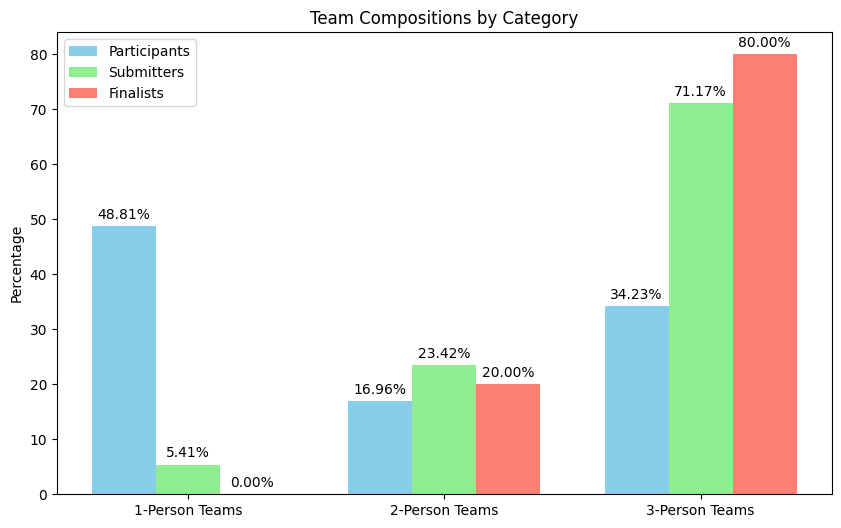

In [127]:
fig, ax = plt.subplots(figsize=(10, 6))
categories = ['1-Person Teams', '2-Person Teams', '3-Person Teams']
x = range(len(categories))
width = 0.25

# 색상 변경
colors = ['skyblue', 'lightgreen', 'salmon']  # 색상 지정

rects1 = ax.bar(x, team_size_data.iloc[0, 1:], width, label='Participants', color=colors[0])
rects2 = ax.bar([p + width for p in x], team_size_data.iloc[1, 1:], width, label='Submitters', color=colors[1])
rects3 = ax.bar([p + width*2 for p in x], team_size_data.iloc[2, 1:], width, label='Finalists', color=colors[2])

ax.set_ylabel('Percentage')
ax.set_title('Team Compositions by Category')
ax.set_xticks([p + width for p in x])
ax.set_xticklabels(categories)
ax.legend()

# 데이터 라벨 추가
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

plt.show()


In [33]:
team_size_data

,Category,1-Person Teams,2-Person Teams,3-Person Teams
0,Participants,48.81,16.96,34.23
1,Submitters,5.41,23.42,71.17
2,Finalists,0.00,20.00,80.00


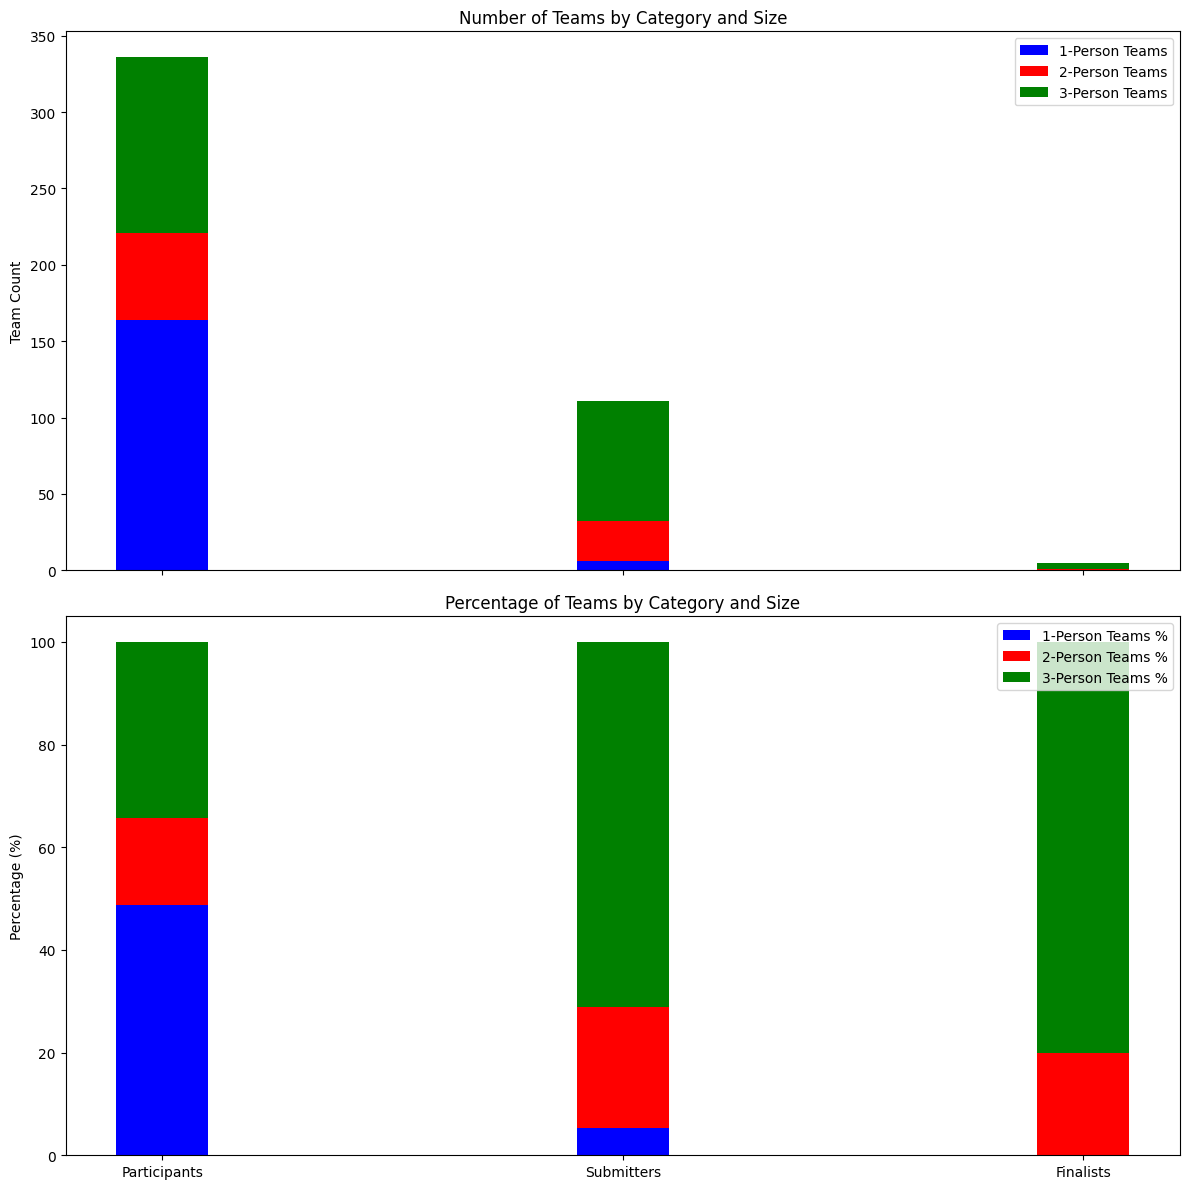

,Category,1-Person Teams Count,2-Person Teams Count,3-Person Teams Count,1-Person Teams %,2-Person Teams %,3-Person Teams %
0,Participants,164,57,115,48.81,16.96,34.23
1,Submitters,6,26,79,5.41,23.42,71.17
2,Finalists,0,1,4,0.00,20.00,80.00


In [34]:
# 인원수와 백분율을 모두 포함한 데이터프레임 생성
team_size_full_data = pd.DataFrame({
    'Category': ['Participants', 'Submitters', 'Finalists'],
    '1-Person Teams Count': [participant_counts.get(1, 0), submitter_counts.get(1, 0), finalist_counts.get(1, 0)],
    '2-Person Teams Count': [participant_counts.get(2, 0), submitter_counts.get(2, 0), finalist_counts.get(2, 0)],
    '3-Person Teams Count': [participant_counts.get(3, 0), submitter_counts.get(3, 0), finalist_counts.get(3, 0)],
    '1-Person Teams %': [participant_proportions.get(1, 0), submitter_proportions.get(1, 0), finalist_proportions.get(1, 0)],
    '2-Person Teams %': [participant_proportions.get(2, 0), submitter_proportions.get(2, 0), finalist_proportions.get(2, 0)],
    '3-Person Teams %': [participant_proportions.get(3, 0), submitter_proportions.get(3, 0), finalist_proportions.get(3, 0)]
})

# 재시각화: 수와 백분율 모두 포함
fig, ax = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# 인원수 그래프
ax[0].bar(team_size_full_data['Category'], team_size_full_data['1-Person Teams Count'], width=0.2, label='1-Person Teams', color='b')
ax[0].bar(team_size_full_data['Category'], team_size_full_data['2-Person Teams Count'], width=0.2, label='2-Person Teams', color='r', bottom=team_size_full_data['1-Person Teams Count'])
ax[0].bar(team_size_full_data['Category'], team_size_full_data['3-Person Teams Count'], width=0.2, label='3-Person Teams', color='g', bottom=team_size_full_data['1-Person Teams Count'] + team_size_full_data['2-Person Teams Count'])

ax[0].set_ylabel('Team Count')
ax[0].set_title('Number of Teams by Category and Size')
ax[0].legend()

# 백분율 그래프
ax[1].bar(team_size_full_data['Category'], team_size_full_data['1-Person Teams %'], width=0.2, label='1-Person Teams %', color='b')
ax[1].bar(team_size_full_data['Category'], team_size_full_data['2-Person Teams %'], width=0.2, label='2-Person Teams %', color='r', bottom=team_size_full_data['1-Person Teams %'])
ax[1].bar(team_size_full_data['Category'], team_size_full_data['3-Person Teams %'], width=0.2, label='3-Person Teams %', color='g', bottom=team_size_full_data['1-Person Teams %'] + team_size_full_data['2-Person Teams %'])

ax[1].set_ylabel('Percentage (%)')
ax[1].set_title('Percentage of Teams by Category and Size')
ax[1].legend()

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

team_size_full_data


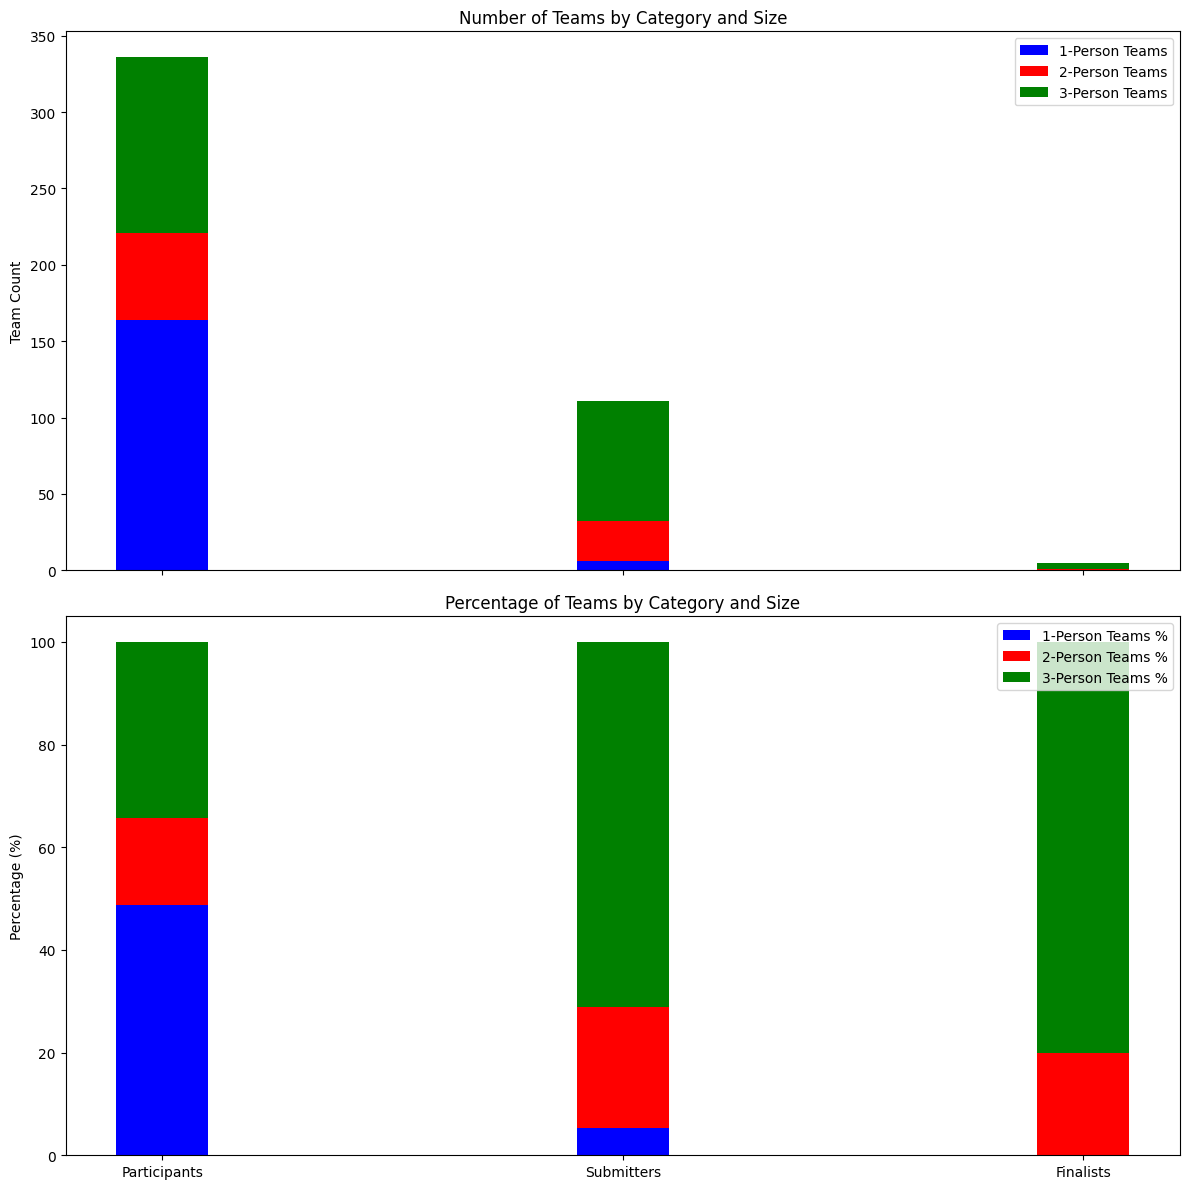

,Category,1-Person Teams Count,2-Person Teams Count,3-Person Teams Count,1-Person Teams %,2-Person Teams %,3-Person Teams %
0,Participants,164,57,115,48.81,16.96,34.23
1,Submitters,6,26,79,5.41,23.42,71.17
2,Finalists,0,1,4,0.00,20.00,80.00


In [36]:
# 인원수와 백분율을 모두 포함한 데이터프레임 생성
team_size_full_data = pd.DataFrame({
    'Category': ['Participants', 'Submitters', 'Finalists'],
    '1-Person Teams Count': [participant_counts.get(1, 0), submitter_counts.get(1, 0), finalist_counts.get(1, 0)],
    '2-Person Teams Count': [participant_counts.get(2, 0), submitter_counts.get(2, 0), finalist_counts.get(2, 0)],
    '3-Person Teams Count': [participant_counts.get(3, 0), submitter_counts.get(3, 0), finalist_counts.get(3, 0)],
    '1-Person Teams %': [participant_proportions.get(1, 0), submitter_proportions.get(1, 0), finalist_proportions.get(1, 0)],
    '2-Person Teams %': [participant_proportions.get(2, 0), submitter_proportions.get(2, 0), finalist_proportions.get(2, 0)],
    '3-Person Teams %': [participant_proportions.get(3, 0), submitter_proportions.get(3, 0), finalist_proportions.get(3, 0)]
})

# 재시각화: 수와 백분율 모두 포함
fig, ax = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# 인원수 그래프
ax[0].bar(team_size_full_data['Category'], team_size_full_data['1-Person Teams Count'], width=0.2, label='1-Person Teams', color='b')
ax[0].bar(team_size_full_data['Category'], team_size_full_data['2-Person Teams Count'], width=0.2, label='2-Person Teams', color='r', bottom=team_size_full_data['1-Person Teams Count'])
ax[0].bar(team_size_full_data['Category'], team_size_full_data['3-Person Teams Count'], width=0.2, label='3-Person Teams', color='g', bottom=team_size_full_data['1-Person Teams Count'] + team_size_full_data['2-Person Teams Count'])

ax[0].set_ylabel('Team Count')
ax[0].set_title('Number of Teams by Category and Size')
ax[0].legend()

# 백분율 그래프
ax[1].bar(team_size_full_data['Category'], team_size_full_data['1-Person Teams %'], width=0.2, label='1-Person Teams %', color='b')
ax[1].bar(team_size_full_data['Category'], team_size_full_data['2-Person Teams %'], width=0.2, label='2-Person Teams %', color='r', bottom=team_size_full_data['1-Person Teams %'])
ax[1].bar(team_size_full_data['Category'], team_size_full_data['3-Person Teams %'], width=0.2, label='3-Person Teams %', color='g', bottom=team_size_full_data['1-Person Teams %'] + team_size_full_data['2-Person Teams %'])

ax[1].set_ylabel('Percentage (%)')
ax[1].set_title('Percentage of Teams by Category and Size')
ax[1].legend()

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

team_size_full_data


In [38]:
# 참가팀과 제출팀에서 각 팀의 구성원 수 계산
participant_team_sizes = updated_participants_df['Team Size'].value_counts().sort_index()
submitter_team_sizes = submitters['Team Size'].value_counts().sort_index()

# 제출율 계산: 제출한 팀 수 / 참가한 팀 수
submission_rates = (submitter_team_sizes / participant_team_sizes * 100).round(2)

# 제출율을 포함한 데이터프레임 생성
submission_rate_df = pd.DataFrame({
    'Team Size': submission_rates.index,
    'Participant Count': participant_team_sizes,
    'Submitter Count': submitter_team_sizes,
    'Submission Rate (%)': submission_rates
}).reset_index(drop=True)

submission_rate_df


,Team Size,Participant Count,Submitter Count,Submission Rate (%)
0,1,164,6,3.66
1,2,57,26,45.61
2,3,115,79,68.70


# 이름명 분석 

In [128]:
# 참가팀 데이터프레임에서 팀명에 괄호 안에 문자가 포함된 팀을 필터링
# 이 정규 표현식은 열린 괄호 다음에 하나 이상의 문자가 있고, 닫힌 괄호로 끝나는 패턴을 찾습니다.
teams_with_content_in_parentheses = updated_participants_df[updated_participants_df['팀이름'].str.contains(r'\([^\)]+\)', na=False)]

teams_with_content_in_parentheses


,팀이름,참가자1,참가자2,참가자3,참가자1뒷자리,참가자2뒷자리,참가자3뒷자리,Members
103,RIDER(Risky IPO Detection Robot),김*현,NaN,NaN,7127.0,NaN,NaN,김*현
110,이데아(AIdos),김*진,허*경,유*연,7536.0,5827.0,9313.0,김*진유*연허*경
139,뉴런(New:Learn),이*철,박*진,성*진,6700.0,9006.0,5329.0,박*진성*진이*철
158,빽투더퓨처(bback to the future),김*은,NaN,NaN,9942.0,NaN,NaN,김*은
205,Ai InVestment Solutions (AIVS): AI와 투자 솔루션의,신*현,두*린,원*연,3898.0,3979.0,8267.0,두*린신*현원*연
208,DNA (DataNaverAsset),이*기,유*민,조*민,2437.0,1078.0,1787.0,유*민이*기조*민
244,도메(인)니저,김*래,NaN,NaN,9055.0,NaN,NaN,김*래
249,초이스(Choi's),최*혁,최*우,NaN,1317.0,3747.0,NaN,최*우최*혁
322,테라스 (Terrace),이*훈,최*서,NaN,4250.0,8482.0,NaN,이*훈최*서


In [129]:
import re

# 팀명을 수정하는 함수 정의
def clean_team_name(name):
    if re.search(r'New:Learn', name):
        return '뉴런'

    elif re.search(r'bback to the future', name, re.IGNORECASE):
        return '빽투더퓨처'
    elif re.search(r'DataNaverAsset', name):
        return 'DNA'
    elif re.search(r'Terrace', name):
        return '테라스'
    else:
        return re.sub(r'\s*\(.*?\)\s*', '', name)

# 팀 이름 수정 적용
updated_participants_df['팀이름'] = updated_participants_df['팀이름'].astype(str).apply(clean_team_name)

# 수정된 팀명 확인
updated_participants_df[['팀이름']].drop_duplicates()  # 중복 제거 후 팀명만 확인


,팀이름
0,퀀트꿈나무
1,Economic Freedom
2,SKKUDS
3,선재 업고 튀어
4,나홀로레벨업
...,...
331,샤통바우
332,에리카와 함께 꿈을
333,Block버스터
334,글로벌퀀트


In [176]:
updated_participants_df

,팀이름,참가자1,참가자2,참가자3,참가자1뒷자리,참가자2뒷자리,참가자3뒷자리,Members,팀이름 유형
0,퀀트꿈나무,문*희,김*수,김*우,914.0,594.0,2117.0,김*수김*우문*희,한글만
1,Economic Freedom,김*재,NaN,NaN,3258.0,NaN,NaN,김*재,영어만
2,SKKUDS,장*영,최*정,NaN,7377.0,2344.0,NaN,장*영최*정,영어만
3,선재 업고 튀어,전*욱,김*재,고*진,2467.0,4622.0,3399.0,고*진김*재전*욱,한글만
4,나홀로레벨업,이*빈,NaN,NaN,5838.0,NaN,NaN,이*빈,한글만
...,...,...,...,...,...,...,...,...,...
331,샤통바우,박*준,조*재,김*원,1922.0,9692.0,3293.0,김*원박*준조*재,한글만
332,에리카와 함께 꿈을,박*영,NaN,NaN,4403.0,NaN,NaN,박*영,한글만
333,Block버스터,정*원,장*규,NaN,2646.0,6414.0,NaN,장*규정*원,영어와 한글 섞임
334,글로벌퀀트,윤*희,안*현,NaN,6594.0,7332.0,NaN,안*현윤*희,한글만


In [130]:
# 팀 이름 수정 적용
submitters['팀이름'] = submitters['팀이름'].astype(str).apply(clean_team_name)

# 수정된 팀명 확인
submitters[['팀이름']].drop_duplicates()  # 중복 제거 후 팀명만 확인


# 팀 이름 수정 적용
finalists['팀이름'] = finalists['팀이름'].astype(str).apply(clean_team_name)

# 수정된 팀명 확인
finalists[['팀이름']].drop_duplicates()  # 중복 제거 후 팀명만 확인


,팀이름
0,DNA
1,DSLab
2,규정스의 하입클로바요
3,디멘션
4,퍼스널llm


In [97]:
# 팀 이름의 유형을 분석하기 위한 함수 정의
def categorize_team_name(name):
    if re.fullmatch(r'[A-Za-z\s]+', name):
        return '영어만'
    elif re.fullmatch(r'[가-힣\s]+', name):
        return '한글만'
    elif re.search(r'[A-Za-z]', name) and re.search(r'[가-힣]', name):
        return '영어와 한글 섞임'
    else:
        return '기타'

# 각 팀 이름을 분류
updated_participants_df['팀이름 유형'] = updated_participants_df['팀이름'].astype(str).apply(categorize_team_name)

# 유형별 비율 계산
name_type_counts = updated_participants_df['팀이름 유형'].value_counts(normalize=True) * 100
name_type_counts = name_type_counts.round(2)  # 소수점 두 자리로 반올림

name_type_counts


팀이름 유형
한글만          65.77
영어만          19.94
영어와 한글 섞임     8.33
기타            5.95
Name: proportion, dtype: float64

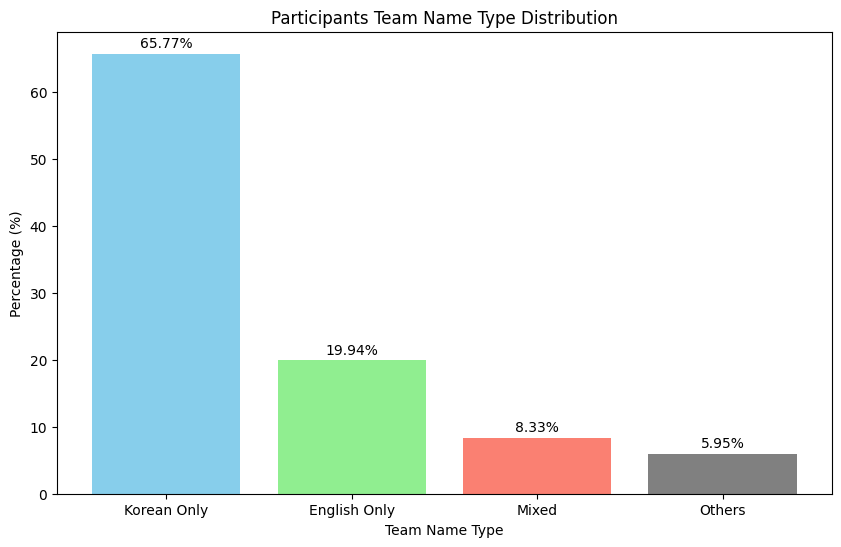

In [131]:
import re

# 팀 이름의 유형을 분석하기 위한 함수 정의
def categorize_team_name(name):
    if re.fullmatch(r'[A-Za-z\s]+', name):
        return '영어만'
    elif re.fullmatch(r'[가-힣\s]+', name):
        return '한글만'
    elif re.search(r'[A-Za-z]', name) and re.search(r'[가-힣]', name):
        return '영어와 한글 섞임'
    else:
        return '기타'

# 각 팀 이름을 분류
updated_participants_df['팀이름 유형'] = updated_participants_df['팀이름'].astype(str).apply(categorize_team_name)

# 유형별 비율 계산
name_type_counts = updated_participants_df['팀이름 유형'].value_counts(normalize=True) * 100
name_type_counts = name_type_counts.round(2)  # 소수점 두 자리로 반올림

# 결과 출력
name_type_counts

# 카테고리 이름을 영어로 변경
name_type_counts.index = ['Korean Only', 'English Only', 'Mixed', 'Others']

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(name_type_counts.index, name_type_counts.values, color=['skyblue', 'lightgreen', 'salmon', 'gray'])

# 막대 위에 비율 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom')

plt.title('Participants Team Name Type Distribution')
plt.xlabel('Team Name Type')
plt.ylabel('Percentage (%)')
plt.show()

In [56]:
# '기타'로 분류된 팀 이름을 확인
other_category_teams = updated_participants_df[updated_participants_df['팀이름 유형'] == '기타']

other_category_teams[['팀이름']]


,팀이름
30,HK123
56,가보자고!
66,ask-lova
89,800
102,WE100
130,KU3J
133,KNU-DART
141,미래에셋?팀원이셋!
142,KMU_DELAb
143,RnED.23


In [132]:
# 제출팀과 결선진출팀에 대해 동일한 분석을 수행
# 제출팀
submitters['팀이름 유형'] = submitters['팀이름'].astype(str).apply(categorize_team_name)
submitter_name_type_counts = submitters['팀이름 유형'].value_counts(normalize=True) * 100
submitter_name_type_counts = submitter_name_type_counts.round(2)

# 결선진출팀
finalists['팀이름 유형'] = finalists['팀이름'].astype(str).apply(categorize_team_name)
finalist_name_type_counts = finalists['팀이름 유형'].value_counts(normalize=True) * 100
finalist_name_type_counts = finalist_name_type_counts.round(2)

# 결과 확인
submitter_name_type_counts, finalist_name_type_counts


(팀이름 유형
 한글만          63.06
 영어만          17.12
 영어와 한글 섞임     9.91
 기타            9.91
 Name: proportion, dtype: float64,
 팀이름 유형
 영어만          40.0
 한글만          40.0
 영어와 한글 섞임    20.0
 Name: proportion, dtype: float64)

In [134]:
finalists


,팀이름,참가자1,참가자2,참가자3,참가자1뒷자리,참가자2뒷자리,참가자3뒷자리,팀이름 유형
0,DNA,이*기,유*민,조*민,2437,1078,1787.0,영어만
1,DSLab,권*훈,윤*정,고*준,3622,9801,1239.0,영어만
2,규정스의 하입클로바요,박*정,이*정,장*석,1585,9064,6287.0,한글만
3,디멘션,송*나,배*성,NaN,6848,6352,NaN,한글만
4,퍼스널llm,조*우,송*원,김*준,6235,7338,6492.0,영어와 한글 섞임


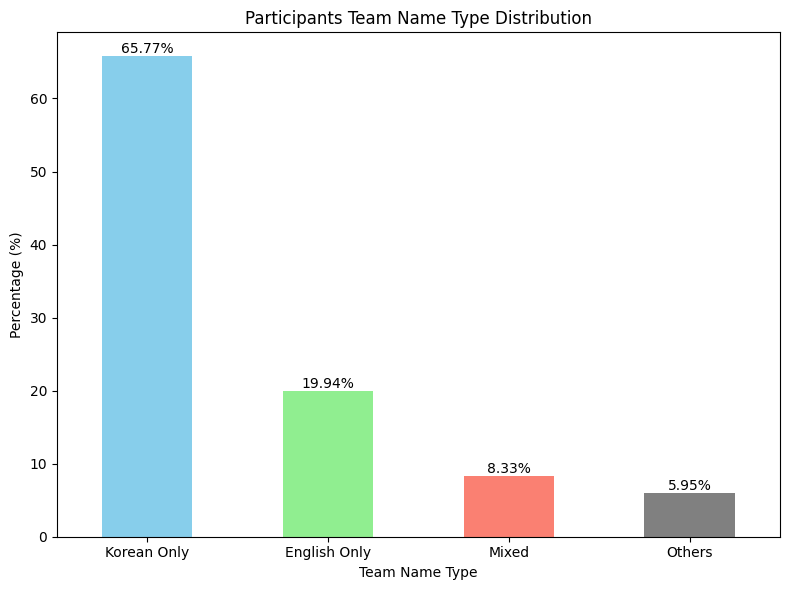

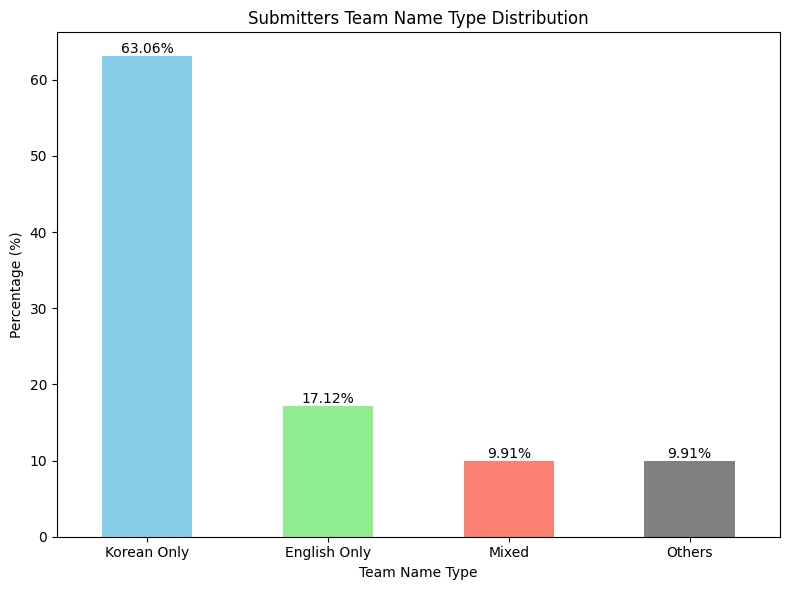

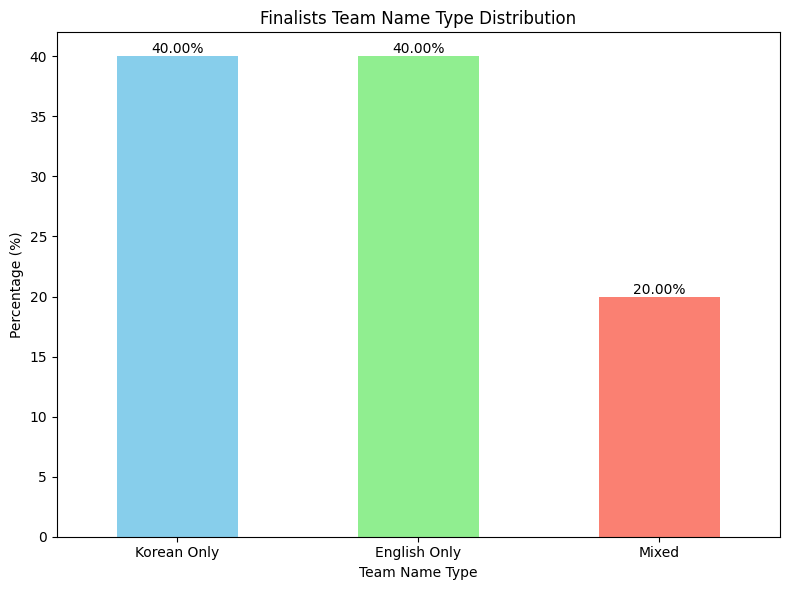

In [135]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_name_type_distribution_with_labels(name_type_counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # 인덱스의 개수에 맞게 카테고리 이름을 할당
    categories = ['Korean Only', 'English Only', 'Mixed', 'Others']
    if len(name_type_counts) == 4:
        name_type_counts.index = categories
    elif len(name_type_counts) == 3:
        name_type_counts.index = categories[:3]
    elif len(name_type_counts) == 2:
        name_type_counts.index = categories[:2]
    
    bars = name_type_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon', 'gray'], ax=ax)
    
    ax.set_title(title)
    ax.set_xlabel('Team Name Type')
    ax.set_ylabel('Percentage (%)')
    plt.xticks(rotation=0)
    
    # 막대 위에 수치 기입
    for i, bar in enumerate(bars.patches):
        ax.text(bar.get_x() + bar.get_width() / 2, 
                bar.get_height(), 
                f'{bar.get_height():.2f}%', 
                ha='center', 
                va='bottom')

    plt.tight_layout()
    plt.show()

# 참가팀, 제출팀, 결선 진출팀 각각에 대한 시각화
plot_name_type_distribution_with_labels(name_type_counts, 'Participants Team Name Type Distribution')
plot_name_type_distribution_with_labels(submitter_name_type_counts, 'Submitters Team Name Type Distribution')
plot_name_type_distribution_with_labels(finalist_name_type_counts, 'Finalists Team Name Type Distribution')


In [177]:
financial_keywords = [
    "퀀트", "저점", "매수", "풀매수", "Economic", "Freedom", "Quant", "펀드", "바이", "금융", "손상차손", 
    "우변", "좌변", "개미", "Fintech", "PI", "PB", "risk", "Risk", "DART", "투자", "Finance", 'IPO', 'Rider'
    "파이낸스", "코인", "캐시우드", "기업", "버핏", "금투세", "hathaway", "M&A", "제임스사이먼스", "주식"
]


# 팀 이름에서 금융 관련 단어가 포함된 경우 필터링
def contains_financial_keyword(name):
    for word in financial_keywords:
        if word.lower() in name.lower():
            return True
    return False

# 금융 관련 단어가 포함된 팀 수 계산
financial_related_teams = updated_participants_df[updated_participants_df['팀이름'].apply(contains_financial_keyword)]
financial_related_team_count = financial_related_teams.shape[0]

financial_related_team_count


31

In [178]:
financial_related_teams

,팀이름,참가자1,참가자2,참가자3,참가자1뒷자리,참가자2뒷자리,참가자3뒷자리,Members,팀이름 유형
0,퀀트꿈나무,문*희,김*수,김*우,914.0,594.0,2117.0,김*수김*우문*희,한글만
1,Economic Freedom,김*재,NaN,NaN,3258.0,NaN,NaN,김*재,영어만
8,바이코리아펀드,김*준,김*환,NaN,5278.0,620.0,NaN,김*준김*환,한글만
12,저점에서풀매수,이*노,NaN,NaN,186.0,NaN,NaN,이*노,한글만
40,슬기로운금융생활,박*혁,NaN,NaN,6980.0,NaN,NaN,박*혁,한글만
48,우변엔 손상차손,손*환,손*연,우*원,7455.0,4639.0,813.0,손*연손*환우*원,한글만
65,AI개미,전*진,NaN,NaN,7778.0,NaN,NaN,전*진,영어와 한글 섞임
73,FutureFintech,김*원,NaN,NaN,7449.0,NaN,NaN,김*원,영어만
79,FuturePI,서*승,고*진,강*서,5815.0,6908.0,5766.0,강*서고*진서*승,영어만
99,빅바이브,정*성,이*준,정*용,4756.0,8260.0,7535.0,이*준정*성정*용,한글만


In [183]:
# 금융 관련 단어 리스트 생성
financial_keywords = [
    "퀀트", "저점", "매수", "풀매수", "Economic", "Freedom", "Quant", "펀드", "금융", "손상차손", 
    "우변", "좌변", "개미", "Fintech", "PI", "PB", "risk", "Risk", "DART", "투자", "Finance", "IPO",'RIDER',
    "파이낸스", "코인", "캐시우드", "기업", "버핏", "금투세", "hathaway", "M&A", "제임스사이먼스", "주식"
]

# 팀 이름에서 금융 관련 단어가 포함된 경우 필터링 함수 정의
def contains_financial_keyword(name):
    name = str(name)  # 문자열로 변환
    for word in financial_keywords:
        if word.lower() in name.lower():
            return True
    return False

# 금융 관련 팀 필터링
financial_related_teams = updated_participants_df[updated_participants_df['팀이름'].apply(contains_financial_keyword)]

# 제출팀 중 금융 관련 팀 필터링
financial_related_submitters = financial_related_teams[financial_related_teams['팀이름'].isin(submitters['팀이름'])]

# 결선 진출팀 중 금융 관련 팀 필터링
financial_related_finalists = financial_related_submitters[financial_related_submitters['팀이름'].isin(finalists['팀이름'])]

# 전체 참가팀 수
total_participants_count = updated_participants_df.shape[0]

# 전체 제출팀 수
total_submitters_count = submitters.shape[0]

# 금융 관련 팀 수
total_team_count = financial_related_teams.shape[0]

# 제출팀 수
submitted_team_count = financial_related_submitters.shape[0]

# 결선 진출팀 수
finalist_team_count = financial_related_finalists.shape[0]

# 전체 참가팀 중 금융 관련 팀 비율
percentage_of_total = round((total_team_count / total_participants_count * 100), 2) if total_participants_count > 0 else 0.0

# 전체 제출팀 중 금융 관련 팀 비율
percentage_of_submitters = round((submitted_team_count / total_submitters_count * 100), 2) if total_submitters_count > 0 else 0.0

# 금융 관련 팀 중 제출율 (32팀 중 몇 팀이 제출했는지)
submission_rate_total = f"{submitted_team_count}/{total_team_count} ({round((submitted_team_count / total_team_count * 100), 2)}%)" if total_team_count > 0 else "0/0 (0%)"

# 제출팀 중 결선 진출율
submission_rate_submitted = f"{finalist_team_count}/{submitted_team_count} ({round((finalist_team_count / submitted_team_count * 100), 2)}%)" if submitted_team_count > 0 else "0/0 (0%)"

# 결과 데이터프레임 생성
final_df = pd.DataFrame({
    'Category': ['Total Financial Related Teams', 'Submitted Financial Related Teams'],
    'Team Count': [total_team_count, submitted_team_count],
    'Percentage of Total Teams (%)': [percentage_of_total, percentage_of_submitters],
    'Submission Rate': [submission_rate_total, submission_rate_submitted]
})

final_df


,Category,Team Count,Percentage of Total Teams (%),Submission Rate
0,Total Financial Related Teams,31,9.23,11/31 (35.48%)
1,Submitted Financial Related Teams,11,9.91,0/11 (0.0%)


In [184]:
financial_related_teams
# financial_related_submitters

,팀이름,참가자1,참가자2,참가자3,참가자1뒷자리,참가자2뒷자리,참가자3뒷자리,Members,팀이름 유형
0,퀀트꿈나무,문*희,김*수,김*우,914.0,594.0,2117.0,김*수김*우문*희,한글만
1,Economic Freedom,김*재,NaN,NaN,3258.0,NaN,NaN,김*재,영어만
8,바이코리아펀드,김*준,김*환,NaN,5278.0,620.0,NaN,김*준김*환,한글만
12,저점에서풀매수,이*노,NaN,NaN,186.0,NaN,NaN,이*노,한글만
40,슬기로운금융생활,박*혁,NaN,NaN,6980.0,NaN,NaN,박*혁,한글만
48,우변엔 손상차손,손*환,손*연,우*원,7455.0,4639.0,813.0,손*연손*환우*원,한글만
65,AI개미,전*진,NaN,NaN,7778.0,NaN,NaN,전*진,영어와 한글 섞임
73,FutureFintech,김*원,NaN,NaN,7449.0,NaN,NaN,김*원,영어만
79,FuturePI,서*승,고*진,강*서,5815.0,6908.0,5766.0,강*서고*진서*승,영어만
103,RIDER,김*현,NaN,NaN,7127.0,NaN,NaN,김*현,영어만


In [157]:
# AI 및 IT 관련 단어 리스트 생성
ai_it_keywords = [
    "AI", "하이퍼러닝", "neural", "NEURAL", "Neural", "Rader", "tech", "Ai", "ai", "파인튜닝", 
    "Robot", "cloud", "톡", "Fin", "telligence", "Telligence", "Intelligence", "인공지능", 
    "인텔리", "llm", "NLP", "LLM", "테라바이트", "지피티", "지능", "인공",  
    "deeplearning", "딥러닝", "크롬", "사파리"
]

# 팀 이름에서 AI 및 IT 관련 단어가 포함된 경우 필터링 함수 정의
def contains_ai_it_keyword(name):
    name = str(name)  # 문자열로 변환
    for word in ai_it_keywords:
        if word.lower() in name.lower():
            return True
    return False

# AI 및 IT 관련 팀 필터링
ai_it_related_teams = updated_participants_df[updated_participants_df['팀이름'].apply(contains_ai_it_keyword)]

# 제출팀 중 AI 및 IT 관련 팀 필터링
ai_it_related_submitters = ai_it_related_teams[ai_it_related_teams['팀이름'].isin(submitters['팀이름'])]

# 결선 진출팀 중 AI 및 IT 관련 팀 필터링
ai_it_related_finalists = ai_it_related_submitters[ai_it_related_submitters['팀이름'].isin(finalists['팀이름'])]

# 전체 참가팀 수
total_participants_count = updated_participants_df.shape[0]

# 전체 제출팀 수
total_submitters_count = submitters.shape[0]

# AI 및 IT 관련 팀 수
total_team_count = ai_it_related_teams.shape[0]

# 제출팀 수
submitted_team_count = ai_it_related_submitters.shape[0]

# 결선 진출팀 수
finalist_team_count = ai_it_related_finalists.shape[0]

# 전체 참가팀 중 AI 및 IT 관련 팀 비율
percentage_of_total = round((total_team_count / total_participants_count * 100), 2) if total_participants_count > 0 else 0.0

# 전체 제출팀 중 AI 및 IT 관련 팀 비율
percentage_of_submitters = round((submitted_team_count / total_submitters_count * 100), 2) if total_submitters_count > 0 else 0.0

# AI 및 IT 관련 팀 중 제출율 (32팀 중 몇 팀이 제출했는지)
submission_rate_total = f"{submitted_team_count}/{total_team_count} ({round((submitted_team_count / total_team_count * 100), 2)}%)" if total_team_count > 0 else "0/0 (0%)"

# 제출팀 중 결선 진출율
submission_rate_submitted = f"{finalist_team_count}/{submitted_team_count} ({round((finalist_team_count / submitted_team_count * 100), 2)}%)" if submitted_team_count > 0 else "0/0 (0%)"

# 결과 데이터프레임 생성
final_df = pd.DataFrame({
    'Category': ['Total AI/IT Related Teams', 'Submitted AI/IT Related Teams'],
    'Team Count': [total_team_count, submitted_team_count],
    'Percentage of Total Teams (%)': [percentage_of_total, percentage_of_submitters],
    'Submission Rate': [submission_rate_total, submission_rate_submitted]
})

final_df


,Category,Team Count,Percentage of Total Teams (%),Submission Rate
0,Total AI/IT Related Teams,41,12.20,15/41 (36.59%)
1,Submitted AI/IT Related Teams,15,13.51,1/15 (6.67%)


In [158]:
ai_it_related_teams

,팀이름,참가자1,참가자2,참가자3,참가자1뒷자리,참가자2뒷자리,참가자3뒷자리,Members,팀이름 유형
9,퓨처AID,권*희,한*경,홍*림,8405.0,4365.0,3306.0,권*희한*경홍*림,영어와 한글 섞임
13,"데이터의 꽃, AI가 피우다: 꽃보다클로바",이*헌,NaN,NaN,5497.0,NaN,NaN,이*헌,영어와 한글 섞임
33,미지의 AI,원*빈,최*지,NaN,5449.0,9240.0,NaN,원*빈최*지,영어와 한글 섞임
37,Neural Frontier,반*하,NaN,NaN,4176.0,NaN,NaN,반*하,영어만
55,Art Rader,김*령,NaN,NaN,3811.0,NaN,NaN,김*령,영어만
62,하이퍼러닝,옥*하,민*지,NaN,5501.0,2230.0,NaN,민*지옥*하,한글만
65,AI개미,전*진,NaN,NaN,7778.0,NaN,NaN,전*진,영어와 한글 섞임
67,FAI,김*진,NaN,NaN,8011.0,NaN,NaN,김*진,영어만
70,Ai다다,강*아,NaN,NaN,972.0,NaN,NaN,강*아,영어와 한글 섞임
73,FutureFintech,김*원,NaN,NaN,7449.0,NaN,NaN,김*원,영어만


In [159]:
# 주최측 이름 단어 리스트 생성
host_keywords = [
    "네이버", "클로바", "하이퍼클로바", "미래에셋", "데이터", "미래", "에셋", "애셋", 
    "Clova", "클로바", "하이퍼", "클로버"
]

# 팀 이름에서 주최측 이름이 포함된 경우 필터링 함수 정의
def contains_host_keyword(name):
    name = str(name)  # 문자열로 변환
    for word in host_keywords:
        if word.lower() in name.lower():
            return True
    return False

# 주최측 이름 관련 팀 필터링
host_related_teams = updated_participants_df[updated_participants_df['팀이름'].apply(contains_host_keyword)]

# 제출팀 중 주최측 이름 관련 팀 필터링
host_related_submitters = host_related_teams[host_related_teams['팀이름'].isin(submitters['팀이름'])]

# 결선 진출팀 중 주최측 이름 관련 팀 필터링
host_related_finalists = host_related_submitters[host_related_submitters['팀이름'].isin(finalists['팀이름'])]

# 전체 참가팀 수
total_participants_count = updated_participants_df.shape[0]

# 전체 제출팀 수
total_submitters_count = submitters.shape[0]

# 주최측 이름 관련 팀 수
total_team_count = host_related_teams.shape[0]

# 제출팀 수
submitted_team_count = host_related_submitters.shape[0]

# 결선 진출팀 수
finalist_team_count = host_related_finalists.shape[0]

# 전체 참가팀 중 주최측 이름 관련 팀 비율
percentage_of_total = round((total_team_count / total_participants_count * 100), 2) if total_participants_count > 0 else 0.0

# 전체 제출팀 중 주최측 이름 관련 팀 비율
percentage_of_submitters = round((submitted_team_count / total_submitters_count * 100), 2) if total_submitters_count > 0 else 0.0

# 주최측 이름 관련 팀 중 제출율 (팀 수와 퍼센트로 표시)
submission_rate_total = f"{submitted_team_count}/{total_team_count} ({round((submitted_team_count / total_team_count * 100), 2)}%)" if total_team_count > 0 else "0/0 (0%)"

# 제출팀 중 결선 진출율
submission_rate_submitted = f"{finalist_team_count}/{submitted_team_count} ({round((finalist_team_count / submitted_team_count * 100), 2)}%)" if submitted_team_count > 0 else "0/0 (0%)"

# 결과 데이터프레임 생성
final_df = pd.DataFrame({
    'Category': ['Total Host Related Teams', 'Submitted Host Related Teams'],
    'Team Count': [total_team_count, submitted_team_count],
    'Percentage of Total Teams (%)': [percentage_of_total, percentage_of_submitters],
    'Submission Rate': [submission_rate_total, submission_rate_submitted]
})

final_df


,Category,Team Count,Percentage of Total Teams (%),Submission Rate
0,Total Host Related Teams,24,7.14,13/24 (54.17%)
1,Submitted Host Related Teams,13,11.71,1/13 (7.69%)


In [160]:
host_related_teams

,팀이름,참가자1,참가자2,참가자3,참가자1뒷자리,참가자2뒷자리,참가자3뒷자리,Members,팀이름 유형
13,"데이터의 꽃, AI가 피우다: 꽃보다클로바",이*헌,NaN,NaN,5497.0,NaN,NaN,이*헌,영어와 한글 섞임
25,클로바,이*빈,박*원,NaN,3911.0,1993.0,NaN,박*원이*빈,한글만
36,데이터탐사대,박*빈,신*수,NaN,6892.0,3389.0,NaN,박*빈신*수,한글만
44,미래우주,서*재,장*연,한*지,NaN,NaN,NaN,서*재장*연한*지,한글만
58,과거현재미래,김*헌,NaN,NaN,4967.0,NaN,NaN,김*헌,한글만
62,하이퍼러닝,옥*하,민*지,NaN,5501.0,2230.0,NaN,민*지옥*하,한글만
113,I am 미래,강*제,NaN,NaN,8148.0,NaN,NaN,강*제,영어와 한글 섞임
114,미래의 에피소드,문*혜,성*수,유*영,635.0,1364.0,6729.0,문*혜성*수유*영,한글만
122,미래램,성*현,최*진,NaN,4645.0,NaN,NaN,성*현최*진,한글만
125,미래의 알바트로스,백*경,이*우,이*우,9689.0,2066.0,3659.0,백*경이*우이*우,한글만


In [161]:
host_related_submitters

,팀이름,참가자1,참가자2,참가자3,참가자1뒷자리,참가자2뒷자리,참가자3뒷자리,Members,팀이름 유형
36,데이터탐사대,박*빈,신*수,NaN,6892.0,3389.0,NaN,박*빈신*수,한글만
44,미래우주,서*재,장*연,한*지,NaN,NaN,NaN,서*재장*연한*지,한글만
114,미래의 에피소드,문*혜,성*수,유*영,635.0,1364.0,6729.0,문*혜성*수유*영,한글만
125,미래의 알바트로스,백*경,이*우,이*우,9689.0,2066.0,3659.0,백*경이*우이*우,한글만
132,미래에도,정*운,이*희,NaN,9296.0,4739.0,NaN,이*희정*운,한글만
137,미래에 CLOVA로 행운을 SET!,홍*화,정*열,김*원,8229.0,8551.0,4088.0,김*원정*열홍*화,영어와 한글 섞임
141,미래에셋?팀원이셋!,허*영,양*욱,안*림,8403.0,3081.0,7884.0,안*림양*욱허*영,기타
181,하이퍼미래,최*필,윤*범,조*빈,5000.0,8964.0,4670.0,윤*범조*빈최*필,한글만
212,ClovAset,김*준,이*규,임*빈,6396.0,7341.0,6091.0,김*준이*규임*빈,영어만
229,규정스의 하입클로바요,박*정,이*정,장*석,1585.0,9064.0,6287.0,박*정이*정장*석,한글만


In [162]:
# 음식료 단어 리스트 생성
food_keywords = [
    "만두", "육회탕탕이", "식혜", "요플", "망고", "진미채", "외지감자", "데감집감자", 
    "을지로의 베이글", "양갱", "보리", "장아찌", "복숭아", "메론", "삼각김밥", "푸아그라", "도토리"
]

# 팀 이름에서 음식료 단어가 포함된 경우 필터링 함수 정의
def contains_food_keyword(name):
    name = str(name)  # 문자열로 변환
    for word in food_keywords:
        if word.lower() in name.lower():
            return True
    return False

# 음식료 관련 팀 필터링
food_related_teams = updated_participants_df[updated_participants_df['팀이름'].apply(contains_food_keyword)]

# 제출팀 중 음식료 관련 팀 필터링
food_related_submitters = food_related_teams[food_related_teams['팀이름'].isin(submitters['팀이름'])]

# 결선 진출팀 중 음식료 관련 팀 필터링
food_related_finalists = food_related_submitters[food_related_submitters['팀이름'].isin(finalists['팀이름'])]

# 전체 참가팀 수
total_participants_count = updated_participants_df.shape[0]

# 전체 제출팀 수
total_submitters_count = submitters.shape[0]

# 음식료 관련 팀 수
total_team_count = food_related_teams.shape[0]

# 제출팀 수
submitted_team_count = food_related_submitters.shape[0]

# 결선 진출팀 수
finalist_team_count = food_related_finalists.shape[0]

# 전체 참가팀 중 음식료 관련 팀 비율
percentage_of_total = round((total_team_count / total_participants_count * 100), 2) if total_participants_count > 0 else 0.0

# 전체 제출팀 중 음식료 관련 팀 비율
percentage_of_submitters = round((submitted_team_count / total_submitters_count * 100), 2) if total_submitters_count > 0 else 0.0

# 음식료 관련 팀 중 제출율 (팀 수와 퍼센트로 표시)
submission_rate_total = f"{submitted_team_count}/{total_team_count} ({round((submitted_team_count / total_team_count * 100), 2)}%)" if total_team_count > 0 else "0/0 (0%)"

# 제출팀 중 결선 진출율
submission_rate_submitted = f"{finalist_team_count}/{submitted_team_count} ({round((finalist_team_count / submitted_team_count * 100), 2)}%)" if submitted_team_count > 0 else "0/0 (0%)"

# 결과 데이터프레임 생성
final_df = pd.DataFrame({
    'Category': ['Total Food Related Teams', 'Submitted Food Related Teams'],
    'Team Count': [total_team_count, submitted_team_count],
    'Percentage of Total Teams (%)': [percentage_of_total, percentage_of_submitters],
    'Submission Rate': [submission_rate_total, submission_rate_submitted]
})

final_df


,Category,Team Count,Percentage of Total Teams (%),Submission Rate
0,Total Food Related Teams,17,5.06,4/17 (23.53%)
1,Submitted Food Related Teams,4,3.60,0/4 (0.0%)


In [163]:
food_related_teams

,팀이름,참가자1,참가자2,참가자3,참가자1뒷자리,참가자2뒷자리,참가자3뒷자리,Members,팀이름 유형
18,자연스럽게만두추가,이*희,이*재,신*현,3616.0,4067.0,661.0,신*현이*재이*희,한글만
26,육회탕탕이,김*훈,서*원,강*인,1761.0,9859.0,9616.0,강*인김*훈서*원,한글만
28,티라노식혜,문*은,정*웅,엄*지,7556.0,5277.0,8965.0,문*은엄*지정*웅,한글만
31,산보리쌍,이*헌,이*현,NaN,3468.0,9196.0,NaN,이*헌이*현,한글만
50,요플뚜껑,최*주,NaN,NaN,2685.0,NaN,NaN,최*주,한글만
51,망고는맛있다,김*훈,NaN,NaN,8938.0,NaN,NaN,김*훈,한글만
115,진미채,이*희,김*연,NaN,3215.0,8550.0,NaN,김*연이*희,한글만
129,외지감자,신*원,강*린,박*하,893.0,3742.0,2019.0,강*린박*하신*원,한글만
151,데감집감자,전*정,서*주,박*라,6231.0,3145.0,1791.0,박*라서*주전*정,한글만
187,양갱,홍*경,NaN,NaN,2072.0,NaN,NaN,홍*경,한글만


In [185]:
updated_participants = updated_participants_df.copy()
# 성의없는 네이밍 팀 이름 리스트 생성
lazy_naming_keywords = [
    "과거현재미래", "세미콜론", "스펙트럼", "AI스", "바흐람", "안박김", "호랑호랑", "수", 
    "디비디비띱", "AI금융투자", "인공지능연구분석", "허거덩", "만원", "하이퍼미래", "당당당", 
    "Quant", "인지인지", "건의", "하이퍼미래", "캐시우드", "이이", "버핏처럼", "아자아자", 
    "금투세", "미래맨", "정이안", "한국의제임스사이먼스", "화이팅", "감동", "팀이름", "AI 혁신가", 
    "김윤정", "Bangkshire hathaway", "Beatles", "선재 업고 튀어", "선재업고튀어", 
    "스카이민혁", "푸앙", "대상혁", "글로벌퀀트"
]

# 팀 이름에서 성의없는 네이밍이 포함된 경우 필터링 함수 정의
def contains_lazy_naming_keyword(name):
    name = str(name)  # 문자열로 변환
    for word in lazy_naming_keywords:
        if word.lower() in name.lower():
            return True
    return False

# 성의없는 네이밍 관련 팀 필터링
lazy_naming_related_teams = updated_participants[updated_participants['팀이름'].apply(contains_lazy_naming_keyword)]

# 제출팀 중 성의없는 네이밍 관련 팀 필터링
lazy_naming_related_submitters = lazy_naming_related_teams[lazy_naming_related_teams['팀이름'].isin(submitters['팀이름'])]

# 결선 진출팀 중 성의없는 네이밍 관련 팀 필터링
lazy_naming_related_finalists = lazy_naming_related_submitters[lazy_naming_related_submitters['팀이름'].isin(finalists['팀이름'])]

# 전체 참가팀 수
total_participants_count = updated_participants.shape[0]

# 전체 제출팀 수
total_submitters_count = submitters.shape[0]

# 성의없는 네이밍 관련 팀 수
total_team_count = lazy_naming_related_teams.shape[0]

# 제출팀 수
submitted_team_count = lazy_naming_related_submitters.shape[0]

# 결선 진출팀 수
finalist_team_count = lazy_naming_related_finalists.shape[0]

# 전체 참가팀 중 성의없는 네이밍 관련 팀 비율
percentage_of_total = round((total_team_count / total_participants_count * 100), 2) if total_participants_count > 0 else 0.0

# 전체 제출팀 중 성의없는 네이밍 관련 팀 비율
percentage_of_submitters = round((submitted_team_count / total_submitters_count * 100), 2) if total_submitters_count > 0 else 0.0

# 성의없는 네이밍 관련 팀 중 제출율 (팀 수와 퍼센트로 표시)
submission_rate_total = f"{submitted_team_count}/{total_team_count} ({round((submitted_team_count / total_team_count * 100), 2)}%)" if total_team_count > 0 else "0/0 (0%)"

# 제출팀 중 결선 진출율
submission_rate_submitted = f"{finalist_team_count}/{submitted_team_count} ({round((finalist_team_count / submitted_team_count * 100), 2)}%)" if submitted_team_count > 0 else "0/0 (0%)"

# 결과 데이터프레임 생성
final_df = pd.DataFrame({
    'Category': ['Total Lazy Naming Related Teams', 'Submitted Lazy Naming Related Teams'],
    'Team Count': [total_team_count, submitted_team_count],
    'Percentage of Total Teams (%)': [percentage_of_total, percentage_of_submitters],
    'Submission Rate': [submission_rate_total, submission_rate_submitted]
})

final_df


,Category,Team Count,Percentage of Total Teams (%),Submission Rate
0,Total Lazy Naming Related Teams,44,13.10,10/44 (22.73%)
1,Submitted Lazy Naming Related Teams,10,9.01,0/10 (0.0%)


In [186]:
lazy_naming_related_teams

,팀이름,참가자1,참가자2,참가자3,참가자1뒷자리,참가자2뒷자리,참가자3뒷자리,Members,팀이름 유형
3,선재 업고 튀어,전*욱,김*재,고*진,2467.0,4622.0,3399.0,고*진김*재전*욱,한글만
12,저점에서풀매수,이*노,NaN,NaN,186.0,NaN,NaN,이*노,한글만
16,건의,이*창,이*의,NaN,1154.0,3320.0,NaN,이*의이*창,한글만
41,바흐람,박*석,NaN,NaN,8687.0,NaN,NaN,박*석,한글만
58,과거현재미래,김*헌,NaN,NaN,4967.0,NaN,NaN,김*헌,한글만
86,세미콜론,김*림,NaN,NaN,7728.0,NaN,NaN,김*림,한글만
95,스펙트럼,박*주,NaN,NaN,2951.0,NaN,NaN,박*주,한글만
111,AI스,김*섭,홍*찬,김*아,6858.0,8113.0,2767.0,김*섭김*아홍*찬,영어와 한글 섞임
119,안박김,안*수,박*우,김*수,4567.0,4977.0,881.0,김*수박*우안*수,한글만
120,호랑호랑,안*아,NaN,NaN,2698.0,NaN,NaN,안*아,한글만


In [187]:
# 유명한 투자자 및 투자회사 이름 리스트 생성
investor_keywords = [
    "캐시우드", "버핏처럼", "한국의제임스사이먼스", "Bangkshire hathaway"
]

# 팀 이름에서 유명한 투자자 및 투자회사 이름이 포함된 경우 필터링 함수 정의
def contains_investor_keyword(name):
    name = str(name)  # 문자열로 변환
    for word in investor_keywords:
        if word.lower() in name.lower():
            return True
    return False

# 유명한 투자자 및 투자회사 이름 관련 팀 필터링
investor_related_teams = updated_participants[updated_participants['팀이름'].apply(contains_investor_keyword)]

# 제출팀 중 유명한 투자자 및 투자회사 이름 관련 팀 필터링
investor_related_submitters = investor_related_teams[investor_related_teams['팀이름'].isin(submitters['팀이름'])]

# 결선 진출팀 중 유명한 투자자 및 투자회사 이름 관련 팀 필터링
investor_related_finalists = investor_related_submitters[investor_related_submitters['팀이름'].isin(finalists['팀이름'])]

# 전체 참가팀 수
total_participants_count = updated_participants.shape[0]

# 전체 제출팀 수
total_submitters_count = submitters.shape[0]

# 유명한 투자자 및 투자회사 이름 관련 팀 수
total_team_count = investor_related_teams.shape[0]

# 제출팀 수
submitted_team_count = investor_related_submitters.shape[0]

# 결선 진출팀 수
finalist_team_count = investor_related_finalists.shape[0]

# 전체 참가팀 중 유명한 투자자 및 투자회사 이름 관련 팀 비율
percentage_of_total = round((total_team_count / total_participants_count * 100), 2) if total_participants_count > 0 else 0.0

# 전체 제출팀 중 유명한 투자자 및 투자회사 이름 관련 팀 비율
percentage_of_submitters = round((submitted_team_count / total_submitters_count * 100), 2) if total_submitters_count > 0 else 0.0

# 유명한 투자자 및 투자회사 이름 관련 팀 중 제출율 (팀 수와 퍼센트로 표시)
submission_rate_total = f"{submitted_team_count}/{total_team_count} ({round((submitted_team_count / total_team_count * 100), 2)}%)" if total_team_count > 0 else "0/0 (0%)"

# 제출팀 중 결선 진출율
submission_rate_submitted = f"{finalist_team_count}/{submitted_team_count} ({round((finalist_team_count / submitted_team_count * 100), 2)}%)" if submitted_team_count > 0 else "0/0 (0%)"

# 결과 데이터프레임 생성
final_df = pd.DataFrame({
    'Category': ['Total Investor Related Teams', 'Submitted Investor Related Teams'],
    'Team Count': [total_team_count, submitted_team_count],
    'Percentage of Total Teams (%)': [percentage_of_total, percentage_of_submitters],
    'Submission Rate': [submission_rate_total, submission_rate_submitted]
})

final_df


,Category,Team Count,Percentage of Total Teams (%),Submission Rate
0,Total Investor Related Teams,4,1.19,1/4 (25.0%)
1,Submitted Investor Related Teams,1,0.90,0/1 (0.0%)


In [189]:
# 할 게 보이는 팀 이름 리스트 생성
visible_task_keywords = [
    "ask-lova", "FuturePI", "손PB", "RIDER(Risky IPO Detection Robot)", "바이코리아펀드", 
    "KNU-DART", "AI금융투자", "인공지능연구분석", "Get on the Trend", "퍼스널llm", 
    "Ai InVestment Solutions (AIVS): AI와 투자 솔루션의", "핵심기업", "주식해체분석", 
    "FinAI", "TAlgers"
]

# 팀 이름에서 할 게 보이는 단어가 포함된 경우 필터링 함수 정의
def contains_visible_task_keyword(name):
    name = str(name)  # 문자열로 변환
    for word in visible_task_keywords:
        if word.lower() in name.lower():
            return True
    return False

# 할 게 보이는 팀 필터링
visible_task_related_teams = updated_participants[updated_participants['팀이름'].apply(contains_visible_task_keyword)]

# 제출팀 중 할 게 보이는 팀 필터링
visible_task_related_submitters = visible_task_related_teams[visible_task_related_teams['팀이름'].isin(submitters['팀이름'])]

# 결선 진출팀 중 할 게 보이는 팀 필터링
visible_task_related_finalists = visible_task_related_submitters[visible_task_related_submitters['팀이름'].isin(finalists['팀이름'])]

# 전체 참가팀 수
total_participants_count = updated_participants.shape[0]

# 전체 제출팀 수
total_submitters_count = submitters.shape[0]

# 할 게 보이는 팀 수
total_team_count = visible_task_related_teams.shape[0]

# 제출팀 수
submitted_team_count = visible_task_related_submitters.shape[0]

# 결선 진출팀 수
finalist_team_count = visible_task_related_finalists.shape[0]

# 전체 참가팀 중 할 게 보이는 팀 비율
percentage_of_total = round((total_team_count / total_participants_count * 100), 2) if total_participants_count > 0 else 0.0

# 전체 제출팀 중 할 게 보이는 팀 비율
percentage_of_submitters = round((submitted_team_count / total_submitters_count * 100), 2) if total_submitters_count > 0 else 0.0

# 할 게 보이는 팀 중 제출율 (팀 수와 퍼센트로 표시)
submission_rate_total = f"{submitted_team_count}/{total_team_count} ({round((submitted_team_count / total_team_count * 100), 2)}%)" if total_team_count > 0 else "0/0 (0%)"

# 제출팀 중 결선 진출율
submission_rate_submitted = f"{finalist_team_count}/{submitted_team_count} ({round((finalist_team_count / submitted_team_count * 100), 2)}%)" if submitted_team_count > 0 else "0/0 (0%)"

# 결과 데이터프레임 생성
final_df = pd.DataFrame({
    'Category': ['Total Visible Task Related Teams', 'Submitted Visible Task Related Teams'],
    'Team Count': [total_team_count, submitted_team_count],
    'Percentage of Total Teams (%)': [percentage_of_total, percentage_of_submitters],
    'Submission Rate': [submission_rate_total, submission_rate_submitted]
})

final_df


,Category,Team Count,Percentage of Total Teams (%),Submission Rate
0,Total Visible Task Related Teams,13,3.87,5/13 (38.46%)
1,Submitted Visible Task Related Teams,5,4.50,1/5 (20.0%)


In [190]:
visible_task_related_teams 

,팀이름,참가자1,참가자2,참가자3,참가자1뒷자리,참가자2뒷자리,참가자3뒷자리,Members,팀이름 유형
8,바이코리아펀드,김*준,김*환,NaN,5278.0,620.0,NaN,김*준김*환,한글만
66,ask-lova,도*민,박*성,NaN,6087.0,6465.0,NaN,도*민박*성,기타
79,FuturePI,서*승,고*진,강*서,5815.0,6908.0,5766.0,강*서고*진서*승,영어만
90,TAlgers,김*석,송*지,은*현,9590.0,2911.0,3639.0,김*석송*지은*현,영어만
106,손PB,김*준,정*우,NaN,1618.0,1487.0,NaN,김*준정*우,영어와 한글 섞임
133,KNU-DART,최*준,박*교,정*현,1210.0,2538.0,2567.0,박*교정*현최*준,기타
144,AI금융투자,안*세,NaN,NaN,9173.0,NaN,NaN,안*세,영어와 한글 섞임
146,인공지능연구분석,김*석,최*훈,손*철,7090.0,9227.0,298.0,김*석손*철최*훈,한글만
170,Get on the Trend,설*형,NaN,NaN,5572.0,NaN,NaN,설*형,영어만
197,퍼스널llm,조*우,송*원,김*준,6235.0,7338.0,6492.0,김*준송*원조*우,영어와 한글 섞임


In [191]:
# 마음에 든 팀 이름 리스트 생성
favorite_team_keywords = [
    "INTERLUDE", "김세희팀", "빛이나는솔로", "T없이 맑은 AI", "초이스(Choi's)", "G O N Z O"
]

# 팀 이름에서 마음에 든 단어가 포함된 경우 필터링 함수 정의
def contains_favorite_team_keyword(name):
    name = str(name)  # 문자열로 변환
    for word in favorite_team_keywords:
        if word.lower() in name.lower():
            return True
    return False

# 마음에 든 팀 필터링
favorite_team_related_teams = updated_participants[updated_participants['팀이름'].apply(contains_favorite_team_keyword)]

# 제출팀 중 마음에 든 팀 필터링
favorite_team_related_submitters = favorite_team_related_teams[favorite_team_related_teams['팀이름'].isin(submitters['팀이름'])]

# 결선 진출팀 중 마음에 든 팀 필터링
favorite_team_related_finalists = favorite_team_related_submitters[favorite_team_related_submitters['팀이름'].isin(finalists['팀이름'])]

# 전체 참가팀 수
total_participants_count = updated_participants.shape[0]

# 전체 제출팀 수
total_submitters_count = submitters.shape[0]

# 마음에 든 팀 수
total_team_count = favorite_team_related_teams.shape[0]

# 제출팀 수
submitted_team_count = favorite_team_related_submitters.shape[0]

# 결선 진출팀 수
finalist_team_count = favorite_team_related_finalists.shape[0]

# 전체 참가팀 중 마음에 든 팀 비율
percentage_of_total = round((total_team_count / total_participants_count * 100), 2) if total_participants_count > 0 else 0.0

# 전체 제출팀 중 마음에 든 팀 비율
percentage_of_submitters = round((submitted_team_count / total_submitters_count * 100), 2) if total_submitters_count > 0 else 0.0

# 마음에 든 팀 중 제출율 (팀 수와 퍼센트로 표시)
submission_rate_total = f"{submitted_team_count}/{total_team_count} ({round((submitted_team_count / total_team_count * 100), 2)}%)" if total_team_count > 0 else "0/0 (0%)"

# 제출팀 중 결선 진출율
submission_rate_submitted = f"{finalist_team_count}/{submitted_team_count} ({round((finalist_team_count / submitted_team_count * 100), 2)}%)" if submitted_team_count > 0 else "0/0 (0%)"

# 결과 데이터프레임 생성
final_df = pd.DataFrame({
    'Category': ['Total Favorite Related Teams', 'Submitted Favorite Related Teams'],
    'Team Count': [total_team_count, submitted_team_count],
    'Percentage of Total Teams (%)': [percentage_of_total, percentage_of_submitters],
    'Submission Rate': [submission_rate_total, submission_rate_submitted]
})

final_df


,Category,Team Count,Percentage of Total Teams (%),Submission Rate
0,Total Favorite Related Teams,5,1.49,1/5 (20.0%)
1,Submitted Favorite Related Teams,1,0.90,0/1 (0.0%)


In [192]:
favorite_team_related_teams

,팀이름,참가자1,참가자2,참가자3,참가자1뒷자리,참가자2뒷자리,참가자3뒷자리,Members,팀이름 유형
39,INTERLUDE,김*연,NaN,NaN,720.0,NaN,NaN,김*연,영어만
52,김세희팀,김*희,NaN,NaN,2412.0,NaN,NaN,김*희,한글만
69,빛이나는솔로,이*영,NaN,NaN,1402.0,NaN,NaN,이*영,한글만
140,T없이 맑은 AI,황*늘,김*호,유*은,3662.0,3720.0,6423.0,김*호유*은황*늘,영어와 한글 섞임
184,G O N Z O,전*훈,NaN,NaN,6593.0,NaN,NaN,전*훈,영어만


In [195]:
# 참가 멤버 이름을 포함한 팀 이름 리스트 생성
member_name_keywords = [
    "상엽이와 규민이", "김세희팀", "승재에몽", "ST_진욱", 
    "희라네", "서지우", "김성후우..", "윤연즈", "서영석", "정정", "규정스의 하입클로바요", 
    "나라", "정이안", "안박김", "정대찬", "이상준", "서치원투쓰리", "김윤정", "아래성진", 
    "은지영", "장은원소", "고기태", "초이스(Choi's)"
]

# 팀 이름에서 참가 멤버 이름이 포함된 경우 필터링 함수 정의
def contains_member_name_keyword(name):
    name = str(name)  # 문자열로 변환
    for word in member_name_keywords:
        if word.lower() in name.lower():
            return True
    return False

# 참가 멤버 이름을 포함한 팀 필터링
member_name_related_teams = updated_participants[updated_participants['팀이름'].apply(contains_member_name_keyword)]

# 제출팀 중 참가 멤버 이름을 포함한 팀 필터링
member_name_related_submitters = member_name_related_teams[member_name_related_teams['팀이름'].isin(submitters['팀이름'])]

# 결선 진출팀 중 참가 멤버 이름을 포함한 팀 필터링
member_name_related_finalists = member_name_related_submitters[member_name_related_submitters['팀이름'].isin(finalists['팀이름'])]

# 전체 참가팀 수
total_participants_count = updated_participants.shape[0]

# 전체 제출팀 수
total_submitters_count = submitters.shape[0]

# 참가 멤버 이름을 포함한 팀 수
total_team_count = member_name_related_teams.shape[0]

# 제출팀 수
submitted_team_count = member_name_related_submitters.shape[0]

# 결선 진출팀 수
finalist_team_count = member_name_related_finalists.shape[0]

# 전체 참가팀 중 참가 멤버 이름을 포함한 팀 비율
percentage_of_total = round((total_team_count / total_participants_count * 100), 2) if total_participants_count > 0 else 0.0

# 전체 제출팀 중 참가 멤버 이름을 포함한 팀 비율
percentage_of_submitters = round((submitted_team_count / total_submitters_count * 100), 2) if total_submitters_count > 0 else 0.0

# 참가 멤버 이름을 포함한 팀 중 제출율 (팀 수와 퍼센트로 표시)
submission_rate_total = f"{submitted_team_count}/{total_team_count} ({round((submitted_team_count / total_team_count * 100), 2)}%)" if total_team_count > 0 else "0/0 (0%)"

# 제출팀 중 결선 진출율
submission_rate_submitted = f"{finalist_team_count}/{submitted_team_count} ({round((finalist_team_count / submitted_team_count * 100), 2)}%)" if submitted_team_count > 0 else "0/0 (0%)"

# 결과 데이터프레임 생성
final_df = pd.DataFrame({
    'Category': ['Total Member Name Related Teams', 'Submitted Member Name Related Teams'],
    'Team Count': [total_team_count, submitted_team_count],
    'Percentage of Total Teams (%)': [percentage_of_total, percentage_of_submitters],
    'Submission Rate': [submission_rate_total, submission_rate_submitted]
})

final_df


,Category,Team Count,Percentage of Total Teams (%),Submission Rate
0,Total Member Name Related Teams,22,6.55,6/22 (27.27%)
1,Submitted Member Name Related Teams,6,5.41,1/6 (16.67%)


In [196]:
member_name_related_teams

,팀이름,참가자1,참가자2,참가자3,참가자1뒷자리,참가자2뒷자리,참가자3뒷자리,Members,팀이름 유형
52,김세희팀,김*희,NaN,NaN,2412.0,NaN,NaN,김*희,한글만
77,승재에몽,박*재,NaN,NaN,1063.0,NaN,NaN,박*재,한글만
100,상엽이와 규민이,이*민,이*엽,정*성,6374.0,2308.0,NaN,이*민이*엽,한글만
107,ST_진욱,김*욱,NaN,NaN,5929.0,NaN,NaN,김*욱,영어와 한글 섞임
119,안박김,안*수,박*우,김*수,4567.0,4977.0,881.0,김*수박*우안*수,한글만
163,희라네,유*라,NaN,NaN,8343.0,NaN,NaN,유*라,한글만
192,서지우,서*우,NaN,NaN,3926.0,NaN,NaN,서*우,한글만
198,김성후우..,김*후,NaN,NaN,4142.0,NaN,NaN,김*후,기타
204,윤연즈,이*윤,백*연,NaN,7231.0,2385.0,NaN,백*연이*윤,한글만
210,서영석,서*석,NaN,NaN,6310.0,NaN,NaN,서*석,한글만


In [188]:
# last name으로 팀 이름을 지은 경우 리스트 생성
last_name_keywords = [
    "안박김", "정이안", "김윤정"
]

# 팀 이름에서 last name이 포함된 경우 필터링 함수 정의
def contains_last_name_keyword(name):
    name = str(name)  # 문자열로 변환
    for word in last_name_keywords:
        if word.lower() in name.lower():
            return True
    return False

# last name 관련 팀 필터링
last_name_related_teams = updated_participants[updated_participants['팀이름'].apply(contains_last_name_keyword)]

# 제출팀 중 last name 관련 팀 필터링
last_name_related_submitters = last_name_related_teams[last_name_related_teams['팀이름'].isin(submitters['팀이름'])]

# 결선 진출팀 중 last name 관련 팀 필터링
last_name_related_finalists = last_name_related_submitters[last_name_related_submitters['팀이름'].isin(finalists['팀이름'])]

# 전체 참가팀 수
total_participants_count = updated_participants.shape[0]

# 전체 제출팀 수
total_submitters_count = submitters.shape[0]

# last name 관련 팀 수
total_team_count = last_name_related_teams.shape[0]

# 제출팀 수
submitted_team_count = last_name_related_submitters.shape[0]

# 결선 진출팀 수
finalist_team_count = last_name_related_finalists.shape[0]

# 전체 참가팀 중 last name 관련 팀 비율
percentage_of_total = round((total_team_count / total_participants_count * 100), 2) if total_participants_count > 0 else 0.0

# 전체 제출팀 중 last name 관련 팀 비율
percentage_of_submitters = round((submitted_team_count / total_submitters_count * 100), 2) if total_submitters_count > 0 else 0.0

# last name 관련 팀 중 제출율 (팀 수와 퍼센트로 표시)
submission_rate_total = f"{submitted_team_count}/{total_team_count} ({round((submitted_team_count / total_team_count * 100), 2)}%)" if total_team_count > 0 else "0/0 (0%)"

# 제출팀 중 결선 진출율
submission_rate_submitted = f"{finalist_team_count}/{submitted_team_count} ({round((finalist_team_count / submitted_team_count * 100), 2)}%)" if submitted_team_count > 0 else "0/0 (0%)"

# 결과 데이터프레임 생성
final_df = pd.DataFrame({
    'Category': ['Total Last Name Related Teams', 'Submitted Last Name Related Teams'],
    'Team Count': [total_team_count, submitted_team_count],
    'Percentage of Total Teams (%)': [percentage_of_total, percentage_of_submitters],
    'Submission Rate': [submission_rate_total, submission_rate_submitted]
})

final_df


,Category,Team Count,Percentage of Total Teams (%),Submission Rate
0,Total Last Name Related Teams,3,0.89,2/3 (66.67%)
1,Submitted Last Name Related Teams,2,1.80,0/2 (0.0%)


In [203]:
# 동물 이름 리스트 생성
animal_keywords = [
    "호랑이", "일어난새", "알파카", "오리", "거북이"
]

# 팀 이름에서 동물 이름이 포함된 경우 필터링 함수 정의
def contains_animal_keyword(name):
    name = str(name)  # 문자열로 변환
    for word in animal_keywords:
        if word.lower() in name.lower():
            return True
    return False

# 동물 이름 관련 팀 필터링
animal_related_teams = updated_participants[updated_participants['팀이름'].apply(contains_animal_keyword)]

# 제출팀 중 동물 이름 관련 팀 필터링
animal_related_submitters = animal_related_teams[animal_related_teams['팀이름'].isin(submitters['팀이름'])]

# 결선 진출팀 중 동물 이름 관련 팀 필터링
animal_related_finalists = animal_related_submitters[animal_related_submitters['팀이름'].isin(finalists['팀이름'])]

# 전체 참가팀 수
total_participants_count = updated_participants.shape[0]

# 전체 제출팀 수
total_submitters_count = submitters.shape[0]

# 동물 이름 관련 팀 수
total_team_count = animal_related_teams.shape[0]

# 제출팀 수
submitted_team_count = animal_related_submitters.shape[0]

# 결선 진출팀 수
finalist_team_count = animal_related_finalists.shape[0]

# 전체 참가팀 중 동물 이름 관련 팀 비율
percentage_of_total = round((total_team_count / total_participants_count * 100), 2) if total_participants_count > 0 else 0.0

# 전체 제출팀 중 동물 이름 관련 팀 비율
percentage_of_submitters = round((submitted_team_count / total_submitters_count * 100), 2) if total_submitters_count > 0 else 0.0

# 동물 이름 관련 팀 중 제출율 (팀 수와 퍼센트로 표시)
submission_rate_total = f"{submitted_team_count}/{total_team_count} ({round((submitted_team_count / total_team_count * 100), 2)}%)" if total_team_count > 0 else "0/0 (0%)"

# 제출팀 중 결선 진출율
submission_rate_submitted = f"{finalist_team_count}/{submitted_team_count} ({round((finalist_team_count / submitted_team_count * 100), 2)}%)" if submitted_team_count > 0 else "0/0 (0%)"

# 결과 데이터프레임 생성
final_df = pd.DataFrame({
    'Category': ['Total Animal Related Teams', 'Submitted Animal Related Teams'],
    'Team Count': [total_team_count, submitted_team_count],
    'Percentage of Total Teams (%)': [percentage_of_total, percentage_of_submitters],
    'Submission Rate': [submission_rate_total, submission_rate_submitted]
})

final_df


,Category,Team Count,Percentage of Total Teams (%),Submission Rate
0,Total Animal Related Teams,5,1.49,2/5 (40.0%)
1,Submitted Animal Related Teams,2,1.80,0/2 (0.0%)


In [204]:
animal_related_teams

,팀이름,참가자1,참가자2,참가자3,참가자1뒷자리,참가자2뒷자리,참가자3뒷자리,Members,팀이름 유형
71,늦게 일어난새,남*욱,NaN,NaN,370.0,NaN,NaN,남*욱,한글만
138,아기호랑이,백*우,이*빈,민*홍,4216.0,5516.0,170.0,민*홍백*우이*빈,한글만
176,알파카,윤*규,최*우,문*준,9393.0,2814.0,6895.0,문*준윤*규최*우,한글만
230,오리,신*섬,조*수,최*용,5773.0,9428.0,2819.0,신*섬조*수최*용,한글만
241,메론거북이,이*연,NaN,NaN,7735.0,NaN,NaN,이*연,한글만


In [85]:
# 이름이 겹치는 팀 이름 리스트 생성
duplicate_name_keywords = [
    "veritas", "이이"
]

# 팀 이름에서 이름이 겹치는 경우 필터링 함수 정의
def contains_duplicate_name_keyword(name):
    name = str(name)  # 문자열로 변환
    for word in duplicate_name_keywords:
        if word.lower() in name.lower():
            return True
    return False

# 이름이 겹치는 팀 필터링
duplicate_name_related_teams = updated_participants[updated_participants['팀이름'].apply(contains_duplicate_name_keyword)]

# 제출팀 중 이름이 겹치는 팀 필터링
duplicate_name_related_submitters = duplicate_name_related_teams[duplicate_name_related_teams['팀이름'].isin(submitters['팀이름'])]

# 결선 진출팀 중 이름이 겹치는 팀 필터링
duplicate_name_related_finalists = duplicate_name_related_submitters[duplicate_name_related_submitters['팀이름'].isin(finalists['팀이름'])]

# 전체 참가팀 수
total_participants_count = updated_participants.shape[0]

# 전체 제출팀 수
total_submitters_count = submitters.shape[0]

# 이름이 겹치는 팀 수
total_team_count = duplicate_name_related_teams.shape[0]

# 제출팀 수
submitted_team_count = duplicate_name_related_submitters.shape[0]

# 결선 진출팀 수
finalist_team_count = duplicate_name_related_finalists.shape[0]

# 전체 참가팀 중 이름이 겹치는 팀 비율
percentage_of_total = round((total_team_count / total_participants_count * 100), 2) if total_participants_count > 0 else 0.0

# 전체 제출팀 중 이름이 겹치는 팀 비율
percentage_of_submitters = round((submitted_team_count / total_submitters_count * 100), 2) if total_submitters_count > 0 else 0.0

# 이름이 겹치는 팀 중 제출율 (팀 수와 퍼센트로 표시)
submission_rate_total = f"{submitted_team_count}/{total_team_count} ({round((submitted_team_count / total_team_count * 100), 2)}%)" if total_team_count > 0 else "0/0 (0%)"

# 제출팀 중 결선 진출율
submission_rate_submitted = f"{finalist_team_count}/{submitted_team_count} ({round((finalist_team_count / submitted_team_count * 100), 2)}%)" if submitted_team_count > 0 else "0/0 (0%)"

# 결과 데이터프레임 생성
final_df = pd.DataFrame({
    'Category': ['Total Duplicate Name Related Teams', 'Submitted Duplicate Name Related Teams'],
    'Team Count': [total_team_count, submitted_team_count],
    'Percentage of Total Teams (%)': [percentage_of_total, percentage_of_submitters],
    'Submission Rate': [submission_rate_total, submission_rate_submitted]
})

final_df


,Category,Team Count,Percentage of Total Teams (%),Submission Rate
0,Total Duplicate Name Related Teams,4,1.19,0/4 (0.0%)
1,Submitted Duplicate Name Related Teams,0,0.00,0/0 (0%)


In [86]:
# "선재"가 포함된 팀 이름 리스트 생성
seonjae_keywords = ["선재"]

# 팀 이름에서 "선재"가 포함된 경우 필터링 함수 정의
def contains_seonjae_keyword(name):
    name = str(name)  # 문자열로 변환
    for word in seonjae_keywords:
        if word.lower() in name.lower():
            return True
    return False

# "선재" 관련 팀 필터링
seonjae_related_teams = updated_participants[updated_participants['팀이름'].apply(contains_seonjae_keyword)]

# 제출팀 중 "선재" 관련 팀 필터링
seonjae_related_submitters = seonjae_related_teams[seonjae_related_teams['팀이름'].isin(submitters['팀이름'])]

# 결선 진출팀 중 "선재" 관련 팀 필터링
seonjae_related_finalists = seonjae_related_submitters[seonjae_related_submitters['팀이름'].isin(finalists['팀이름'])]

# 전체 참가팀 수
total_participants_count = updated_participants.shape[0]

# 전체 제출팀 수
total_submitters_count = submitters.shape[0]

# "선재" 관련 팀 수
total_team_count = seonjae_related_teams.shape[0]

# 제출팀 수
submitted_team_count = seonjae_related_submitters.shape[0]

# 결선 진출팀 수
finalist_team_count = seonjae_related_finalists.shape[0]

# 전체 참가팀 중 "선재" 관련 팀 비율
percentage_of_total = round((total_team_count / total_participants_count * 100), 2) if total_participants_count > 0 else 0.0

# 전체 제출팀 중 "선재" 관련 팀 비율
percentage_of_submitters = round((submitted_team_count / total_submitters_count * 100), 2) if total_submitters_count > 0 else 0.0

# "선재" 관련 팀 중 제출율 (팀 수와 퍼센트로 표시)
submission_rate_total = f"{submitted_team_count}/{total_team_count} ({round((submitted_team_count / total_team_count * 100), 2)}%)" if total_team_count > 0 else "0/0 (0%)"

# 제출팀 중 결선 진출율
submission_rate_submitted = f"{finalist_team_count}/{submitted_team_count} ({round((finalist_team_count / submitted_team_count * 100), 2)}%)" if submitted_team_count > 0 else "0/0 (0%)"

# 결과 데이터프레임 생성
final_df = pd.DataFrame({
    'Category': ['Total "Seonjae" Related Teams', 'Submitted "Seonjae" Related Teams'],
    'Team Count': [total_team_count, submitted_team_count],
    'Percentage of Total Teams (%)': [percentage_of_total, percentage_of_submitters],
    'Submission Rate': [submission_rate_total, submission_rate_submitted]
})

final_df


,Category,Team Count,Percentage of Total Teams (%),Submission Rate
0,"Total ""Seonjae"" Related Teams",2,0.6,1/2 (50.0%)
1,"Submitted ""Seonjae"" Related Teams",1,0.9,0/1 (0.0%)


In [91]:
import pandas as pd

# 키워드 필터링 함수 정의
def contains_keyword(name, keywords):
    name = str(name).lower()
    return any(keyword.lower() in name for keyword in keywords)

# 데이터프레임 복사
updated_participants = updated_participants_df.copy()

# 팀 이름 특성 생성
updated_participants['is_english'] = updated_participants['팀이름'].apply(contains_english).astype(int)
updated_participants['is_korean'] = updated_participants['팀이름'].apply(contains_korean).astype(int)
updated_participants['is_mixed'] = (updated_participants['is_english'] & updated_participants['is_korean']).astype(int)

# 키워드 관련 특성 생성
updated_participants['contains_ai_keyword'] = updated_participants['팀이름'].apply(lambda x: contains_keyword(x, ai_it_keywords)).astype(int)
updated_participants['contains_financial_keyword'] = updated_participants['팀이름'].apply(lambda x: contains_keyword(x, financial_keywords)).astype(int)
updated_participants['contains_food_keyword'] = updated_participants['팀이름'].apply(lambda x: contains_keyword(x, food_keywords)).astype(int)
updated_participants['contains_animal_keyword'] = updated_participants['팀이름'].apply(lambda x: contains_keyword(x, animal_keywords)).astype(int)
updated_participants['contains_investor_keyword'] = updated_participants['팀이름'].apply(lambda x: contains_keyword(x, investor_keywords)).astype(int)
updated_participants['contains_host_keyword'] = updated_participants['팀이름'].apply(lambda x: contains_keyword(x, host_keywords)).astype(int)
updated_participants['contains_lazy_naming_keyword'] = updated_participants['팀이름'].apply(lambda x: contains_keyword(x, lazy_naming_keywords)).astype(int)
updated_participants['contains_visible_task_keyword'] = updated_participants['팀이름'].apply(lambda x: contains_keyword(x, visible_task_keywords)).astype(int)
updated_participants['contains_member_name_keyword'] = updated_participants['팀이름'].apply(lambda x: contains_keyword(x, member_name_keywords)).astype(int)

# 팀 구성 특성 생성
updated_participants['team_size'] = updated_participants[['참가자1', '참가자2', '참가자3']].notna().sum(axis=1)

# 제출 및 결선 진출 여부
updated_participants['submitted'] = updated_participants['팀이름'].isin(submitters['팀이름']).astype(int)
updated_participants['finalist'] = updated_participants['팀이름'].isin(finalists['팀이름']).astype(int)

# 군집 분석을 위한 최종 데이터프레임
clustering_features = updated_participants[[
    'is_english', 'is_korean', 'is_mixed',
    'contains_ai_keyword', 'contains_financial_keyword', 'contains_food_keyword', 
    'contains_animal_keyword', 'contains_investor_keyword', 'contains_host_keyword', 
    'contains_lazy_naming_keyword', 'contains_visible_task_keyword', 
    'contains_member_name_keyword', 'team_size', 'submitted', 'finalist'
]]

# 준비된 데이터프레임 확인
clustering_features


,is_english,is_korean,is_mixed,contains_ai_keyword,contains_financial_keyword,contains_food_keyword,contains_animal_keyword,contains_investor_keyword,contains_host_keyword,contains_lazy_naming_keyword,contains_visible_task_keyword,contains_member_name_keyword,team_size,submitted,finalist
0,0,1,0,0,1,0,0,0,0,0,0,0,3,1,0
1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0
3,0,1,0,0,0,0,0,0,0,1,0,1,3,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0
332,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
333,1,1,1,0,0,0,0,0,0,0,0,0,2,0,0
334,0,1,0,0,1,0,0,0,0,1,0,0,2,0,0


C:\Users\imtig\AppData\Local\Temp\ipykernel_20932\303134067.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_features['Cluster'] = clusters


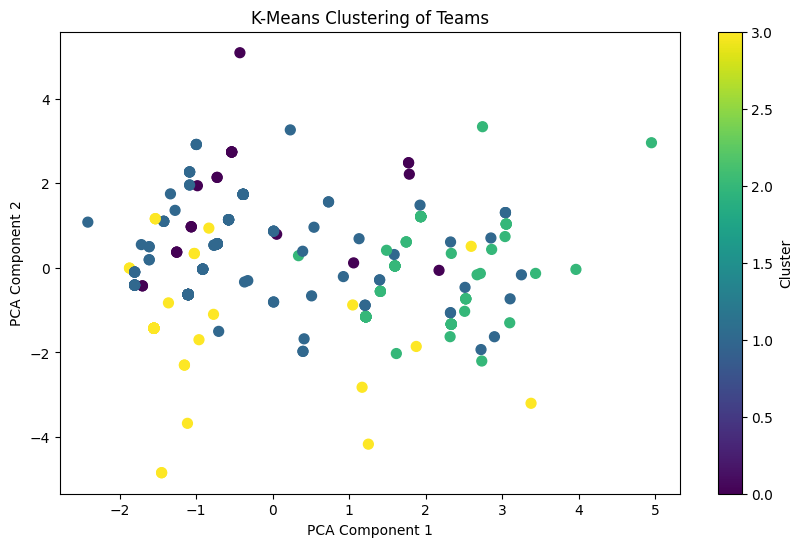

In [92]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# K-Means 클러스터링
kmeans = KMeans(n_clusters=4, random_state=42)  # 클러스터 수는 임의로 4로 설정
clusters = kmeans.fit_predict(scaled_features)

# 클러스터 결과를 원래 데이터프레임에 추가
clustering_features['Cluster'] = clusters

# PCA를 사용하여 2차원으로 시각화
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Teams')
plt.colorbar(label='Cluster')
plt.show()


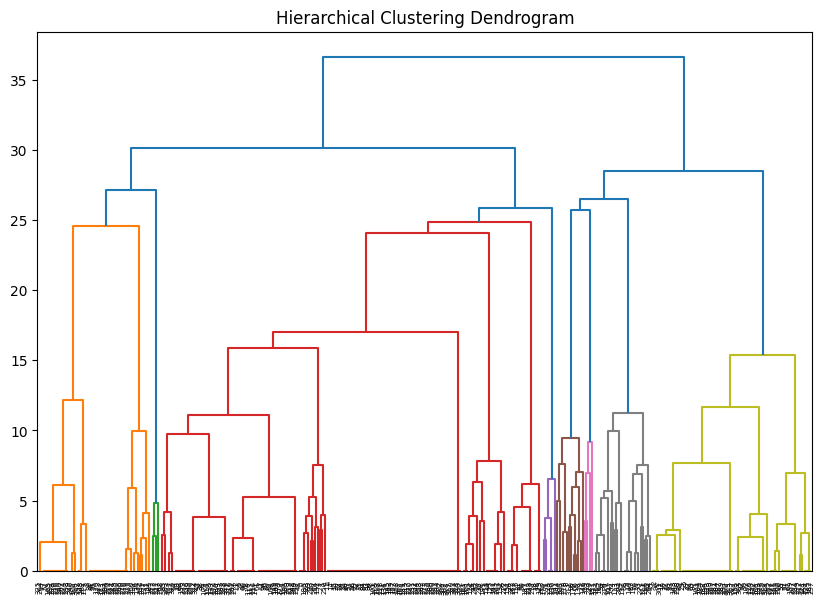

C:\Users\imtig\AppData\Local\Temp\ipykernel_20932\2690341496.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_features['Hierarchical_Cluster'] = hierarchical_clusters


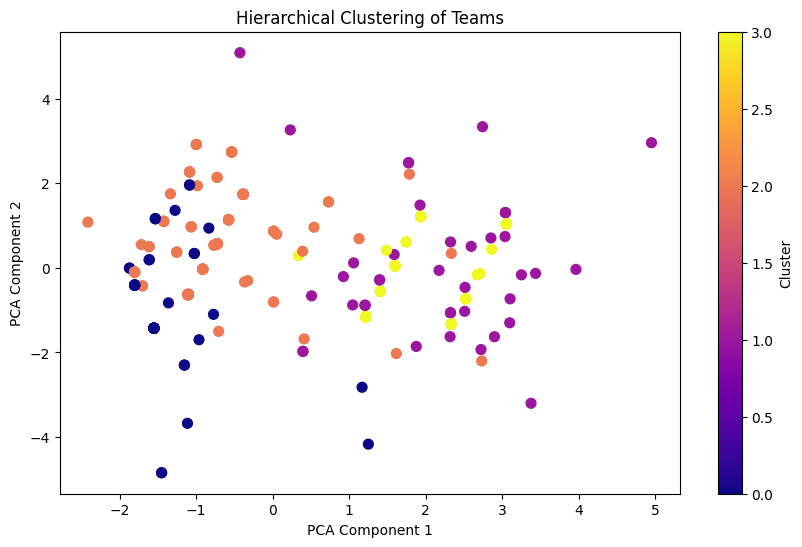

In [94]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Hierarchical Clustering Dendrogram
linked = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Hierarchical Clustering with 4 clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hierarchical_clusters = hierarchical_clustering.fit_predict(scaled_features)

# Adding the cluster labels to the DataFrame
clustering_features['Hierarchical_Cluster'] = hierarchical_clusters

# PCA for 2D Visualization
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=hierarchical_clusters, cmap='plasma', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Hierarchical Clustering of Teams')
plt.colorbar(label='Cluster')
plt.show()


In [95]:
# 군집별로 평균 계산
cluster_means = clustering_features.groupby('Cluster').mean()
cluster_means


,is_english,is_korean,is_mixed,contains_ai_keyword,contains_financial_keyword,contains_food_keyword,contains_animal_keyword,contains_investor_keyword,contains_host_keyword,contains_lazy_naming_keyword,contains_visible_task_keyword,contains_member_name_keyword,team_size,submitted,finalist,Hierarchical_Cluster
Cluster,,,,,,,,,,,,,,,,
0,0.208333,0.958333,0.166667,0.083333,0.000000,0.000000,0.000000,0.0,1.0,0.125000,0.000000,0.041667,2.166667,0.541667,0.041667,1.791667
1,0.104712,1.000000,0.104712,0.094241,0.089005,0.089005,0.031414,0.0,0.0,0.000000,0.020942,0.094241,1.821990,0.303665,0.005236,1.696335
2,0.987654,0.012346,0.012346,0.271605,0.061728,0.000000,0.000000,0.0,0.0,0.012346,0.086420,0.000000,1.962963,0.333333,0.024691,2.765432
3,0.125000,0.950000,0.075000,0.100000,0.250000,0.000000,0.000000,0.1,0.0,1.000000,0.050000,0.125000,1.600000,0.200000,0.000000,0.100000


In [96]:
# 군집별 주요 키워드 포함 여부 빈도 계산
cluster_keyword_counts = clustering_features.groupby('Cluster')[['contains_ai_keyword', 'contains_financial_keyword', 'contains_food_keyword']].sum()
cluster_keyword_counts


,contains_ai_keyword,contains_financial_keyword,contains_food_keyword
Cluster,,,
0,2,0,0
1,18,17,17
2,22,5,0
3,4,10,0
